<a href="https://colab.research.google.com/github/oluwadamilola/Topic-Modelling/blob/main/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.

singnal financial news dataset -

#import Libraries

In [ ]:
!pip install pyLDAvis

In [ ]:
import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# The Data Preprocessing

*   cnbc data was used because there is a limited resource on colab to handle large data




In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/cnbc_headlines.csv")

# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
#data = data.Description.str.replace("[^A-Za-z ]", " ")

data.head()


Headlines  \
0  Jim Cramer: A better way to invest in the Covi...   
1     Cramer's lightning round: I would own Teradyne   
2                                                NaN   
3  Cramer's week ahead: Big week for earnings, ev...   
4  IQ Capital CEO Keith Bliss says tech and healt...   

                             Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
2                             NaN   
3   7:25  PM ET Fri, 17 July 2020   
4   4:24  PM ET Fri, 17 July 2020   

                                         Description  
0  "Mad Money" host Jim Cramer recommended buying...  
1  "Mad Money" host Jim Cramer rings the lightnin...  
2                                                NaN  
3  "We'll pay more for the earnings of the non-Co...  
4  Keith Bliss, IQ Capital CEO, joins "Closing Be...

In [ ]:
print(data.columns)

Index(['Headlines', 'Time', 'Description'], dtype='object')


In [ ]:
#drop NAN values
data = data.dropna()

In [ ]:
data.head()

Headlines  \
0  Jim Cramer: A better way to invest in the Covi...   
1     Cramer's lightning round: I would own Teradyne   
3  Cramer's week ahead: Big week for earnings, ev...   
4  IQ Capital CEO Keith Bliss says tech and healt...   
5  Wall Street delivered the 'kind of pullback I'...   

                             Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
3   7:25  PM ET Fri, 17 July 2020   
4   4:24  PM ET Fri, 17 July 2020   
5   7:36  PM ET Thu, 16 July 2020   

                                         Description  
0  "Mad Money" host Jim Cramer recommended buying...  
1  "Mad Money" host Jim Cramer rings the lightnin...  
3  "We'll pay more for the earnings of the non-Co...  
4  Keith Bliss, IQ Capital CEO, joins "Closing Be...  
5  "Look for the stocks of high-quality companies...

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from sklearn.model_selection import train_test_split
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens


In [ ]:
# here we Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
data_train.head(4)

Headlines  \
507   Jim Cramer: Tuesday's relief rally created an ...   
994   'I'm actually excited' about the iPhone's pros...   
173   Jim Cramer on Moderna vaccine-sparked rally: '...   
1845  Cramer: Buy shares in cloud plays Salesforce, ...   

                                Time  \
507     6:43  PM ET Tue,  4 Feb 2020   
994    8:20  PM ET Fri, 20 Sept 2019   
173     7:56  PM ET Thu,  7 May 2020   
1845    7:42  PM ET Fri,  7 Dec 2018   

                                            Description  
507   "I'd use this rosy moment to reposition, do so...  
994   "Sure, the trade war's taking its toll on busi...  
173   "This market does have a tendency to bounce be...  
1845  Jim Cramer recommends scaling into the stocks ...

In [ ]:
# Apply pre-processing to your dataset
all_words = data_train['Description'].apply(preprocess_text)

In [ ]:
all_words.head(4)


507     [use, rosy, moment, reposition, selling, stock...
994     [sure, trade, war, taking, toll, business, tak...
173     [market, doe, tendency, bounce, unbridled, opt...
1845    [jim, cramer, recommends, scaling, stock, clou...
Name: Description, dtype: object

#Build the LDA model

Task involve includes
1. create dictionary of words
2. create copus
3. running the LDA

In [ ]:
dictionary = corpora.Dictionary(all_words)
corpus = [dictionary.doc2bow(text) for text in all_words]

In [ ]:
from gensim import models
from gensim import corpora
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
from gensim import models

# Running LDA with specified η
num_topics = 10  # this code Specify the desired number of topics
eta_value = 0.01  # for the experiment we adjust this value as needed

lda_model = gensim.models.LdaModel(
    corpus_tfidf,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,
    random_state=42,
    eta=eta_value  # Add the eta parameter here
)


In [ ]:
# Print the topics and their top words
for topic_id, topic_words in lda_model.print_topics(num_words=15):
    print("Topic", topic_id, ":", topic_words)

Topic 0 : 0.017*"report" + 0.015*"week" + 0.012*"earnings" + 0.012*"cnbc" + 0.011*"ahead" + 0.009*"reveals" + 0.009*"ceo" + 0.009*"break" + 0.009*"interview" + 0.009*"market" + 0.008*"look" + 0.008*"sits" + 0.008*"trade" + 0.008*"could" + 0.008*"say"
Topic 1 : 0.014*"ceo" + 0.014*"never" + 0.013*"panic" + 0.013*"bank" + 0.011*"sits" + 0.011*"earnings" + 0.010*"say" + 0.009*"global" + 0.009*"several" + 0.008*"product" + 0.008*"buying" + 0.008*"investor" + 0.008*"discus" + 0.008*"report" + 0.007*"said"
Topic 2 : 0.046*"take" + 0.044*"favorite" + 0.034*"pick" + 0.032*"including" + 0.030*"day" + 0.029*"caller" + 0.027*"delivers" + 0.027*"stock" + 0.026*"call" + 0.025*"play" + 0.025*"viewer" + 0.018*"thought" + 0.013*"fly" + 0.012*"answer" + 0.012*"share"
Topic 3 : 0.013*"action" + 0.012*"lilly" + 0.012*"eli" + 0.011*"industrial" + 0.010*"share" + 0.010*"amazon" + 0.009*"ceo" + 0.009*"recent" + 0.009*"space" + 0.009*"chart" + 0.009*"wa" + 0.009*"said" + 0.008*"working" + 0.008*"push" + 0.00

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.091500  0.044340       1        1  12.790978
4     -0.312480  0.094666       2        1  11.055119
5     -0.058470 -0.004082       3        1  10.974193
8      0.074835  0.093394       4        1  10.897997
7      0.081043  0.191679       5        1  10.231919
1      0.099750 -0.066964       6        1  10.004645
2     -0.257784 -0.126423       7        1   9.603721
9      0.114888  0.029068       8        1   8.466327
3      0.066938  0.029722       9        1   8.378138
6      0.099780 -0.285399      10        1   7.596963, topic_info=           Term       Freq      Total Category  logprob  loglift
88    lightning  41.000000  41.000000  Default  30.0000  30.0000
195       round  41.000000  41.000000  Default  29.0000  29.0000
189        bell  36.000000  36.000000  Default  28.0000  28.0000
190      giving  35.000000  35.000000  Default  27.0000  27.0000
194        ring  35.000000  35.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
2063      sheet   3.728321   5.249020  Topic10  -4.9896   2.2353
62        could   4.117190  32.375040  Topic10  -4.8903   0.5152
801      around   3.799139  11.644371  Topic10  -4.9707   1.4574
288          ha   3.853637  23.725899  Topic10  -4.9565   0.7599
134        cnbc   3.735213  26.841822  Topic10  -4.9877   0.6053

[540 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4397      3  1.063287  account
247       1  0.233511   action
247       7  0.155674   action
247       9  0.622696   action
1715      5  0.895611      add
...     ...       ...      ...
3543      5  0.937292     york
151       2  0.980558      zip
183       3  0.413324     zoom
183       7  0.578653     zoom
2318      3  0.835291   zoomed

[839 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 9, 8, 2, 3, 10, 4, 7])

In [ ]:
num_words = 15

for topic_id in range(lda_model.num_topics):
    topic_words = lda_model.show_topic(topic_id, topn=num_words)

    # Calculate the sum of probabilities
    total_prob = sum(prob for word, prob in topic_words)

    print(f"Topic {topic_id}:")
    for word, prob in topic_words:
        # Normalize the probability to 4 decimal places
        normalized_prob = round(prob / total_prob, 4)
        print(f"{word}: {normalized_prob}")
    print("\n")


Topic 0:
report: 0.11
week: 0.0968
earnings: 0.0797
cnbc: 0.079
ahead: 0.0732
reveals: 0.0621
ceo: 0.0619
break: 0.0593
interview: 0.0592
market: 0.0565
look: 0.0548
sits: 0.054
trade: 0.0513
could: 0.0513
say: 0.0508


Topic 1:
ceo: 0.0916
never: 0.0914
panic: 0.0858
bank: 0.0826
sits: 0.0756
earnings: 0.0752
say: 0.0638
global: 0.062
several: 0.0603
product: 0.0555
buying: 0.0546
investor: 0.0527
discus: 0.051
report: 0.0504
said: 0.0475


Topic 2:
take: 0.1136
favorite: 0.1103
pick: 0.0845
including: 0.0789
day: 0.075
caller: 0.0726
delivers: 0.0678
stock: 0.0675
call: 0.0649
play: 0.0626
viewer: 0.0622
thought: 0.0457
fly: 0.033
answer: 0.0308
share: 0.0305


Topic 3:
action: 0.0895
lilly: 0.0855
eli: 0.0846
industrial: 0.0738
share: 0.0657
amazon: 0.0654
ceo: 0.0646
recent: 0.0638
space: 0.0636
chart: 0.0601
wa: 0.0592
said: 0.0585
working: 0.0579
push: 0.0568
federal: 0.0509


Topic 4:
lightning: 0.0846
round: 0.084
bell: 0.0747
question: 0.0737
giving: 0.0734
ring: 0.0734
answer

#Testing the model on the test split of the data

In [ ]:
test_words = data_test['Description'].apply(preprocess_text)

In [ ]:
test_dictionary = corpora.Dictionary(test_words)
test_corpus = [dictionary.doc2bow(text) for text in test_words]

In [ ]:
print(test_corpus)

[[(11, 1), (39, 1), (60, 1), (192, 1), (467, 1), (468, 1), (471, 1), (1998, 1), (2156, 1), (2579, 1), (3036, 1)], [(11, 1), (18, 1), (19, 1), (134, 1), (150, 1), (288, 1), (675, 1), (912, 1), (4072, 1)], [(13, 1), (18, 1), (19, 1), (46, 1), (53, 1), (69, 1), (212, 1), (244, 1), (711, 1), (1119, 1), (2505, 1), (2938, 1)], [(13, 1), (18, 1), (19, 1), (84, 1), (91, 1), (92, 1), (99, 1), (271, 1), (307, 1), (764, 1)], [(11, 1), (13, 2), (18, 1), (19, 1), (31, 1), (400, 1), (667, 1), (1370, 1), (1557, 1), (1711, 1), (4565, 1)], [(17, 1), (18, 1), (19, 1), (60, 1), (255, 1), (1295, 1), (2062, 1), (2409, 1), (2654, 1), (2854, 1), (3995, 1), (3996, 1)], [(18, 1), (19, 1), (39, 1), (173, 1), (285, 1), (440, 1), (469, 1), (866, 1), (953, 1), (1625, 1), (2159, 1), (2326, 1), (3372, 1)], [(18, 1), (19, 1), (39, 1), (60, 1), (61, 1), (145, 1), (162, 1), (231, 1), (261, 1), (557, 1), (1091, 1), (1310, 1), (1888, 2), (3331, 1), (3335, 1)], [(18, 1), (19, 1), (31, 1), (39, 1), (67, 1), (126, 1), (356,

In [ ]:
test_topic_predictions = [lda_model[doc] for doc in test_corpus]

In [ ]:
for i in range(10):  # Print topics for the first 5 test documents
    print(f"Test Document {i + 1} Topics: {test_topic_predictions[i]}")

Test Document 1 Topics: [(0, 0.45830885), (3, 0.13025814), (5, 0.23757279), (7, 0.11926894)]
Test Document 2 Topics: [(0, 0.011115288), (1, 0.011114185), (2, 0.0111133205), (3, 0.011112738), (4, 0.011113578), (5, 0.011113489), (6, 0.011114031), (7, 0.01111431), (8, 0.8999759), (9, 0.011113241)]
Test Document 3 Topics: [(0, 0.33874345), (5, 0.17720851), (6, 0.18853763), (7, 0.24548914)]
Test Document 4 Topics: [(2, 0.9181771)]
Test Document 5 Topics: [(2, 0.2124099), (3, 0.11751728), (5, 0.2385392), (8, 0.38150653)]
Test Document 6 Topics: [(1, 0.31397668), (6, 0.26594442), (7, 0.35639635)]
Test Document 7 Topics: [(0, 0.1764661), (1, 0.12773824), (2, 0.11503636), (5, 0.34461996), (6, 0.104929015), (7, 0.10039508)]
Test Document 8 Topics: [(1, 0.15221108), (4, 0.2958383), (5, 0.2832266), (6, 0.22871031)]
Test Document 9 Topics: [(1, 0.31788176), (7, 0.14421137), (8, 0.47955033)]
Test Document 10 Topics: [(1, 0.20992129), (3, 0.28461882), (4, 0.23559988), (7, 0.2323012)]


Test Document 1 Topics:
Topic 0: Probability 0.4583088457584381


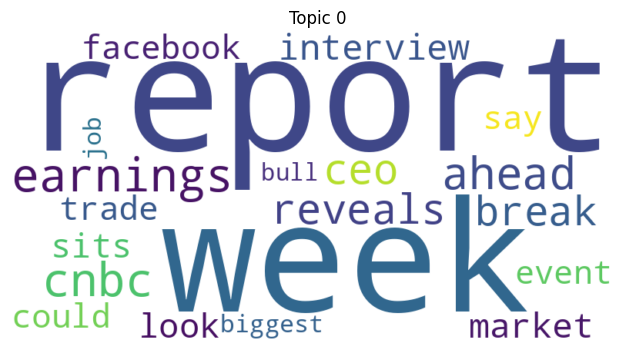

Topic 3: Probability 0.13025814294815063


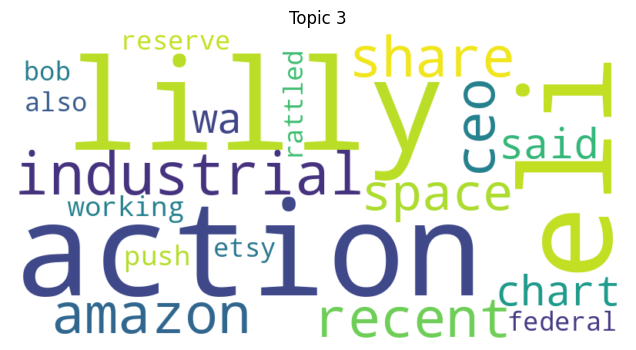

Topic 5: Probability 0.2375727891921997


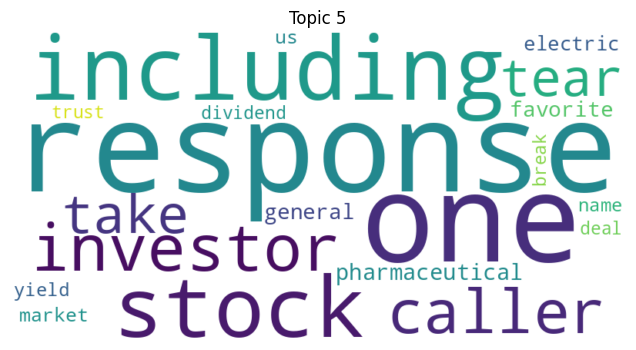

Topic 7: Probability 0.11926893889904022


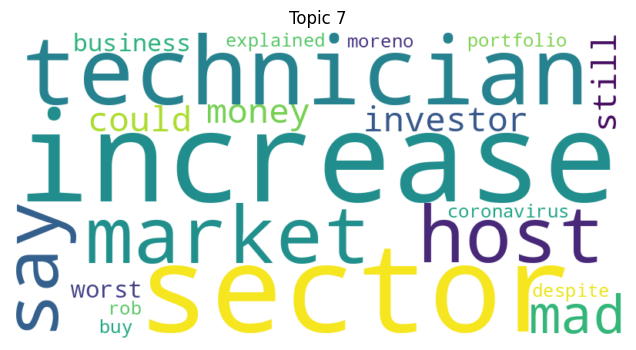

Test Document 2 Topics:
Topic 0: Probability 0.011115288361907005


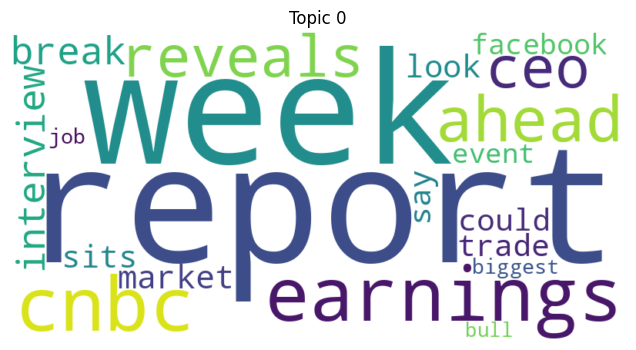

Topic 1: Probability 0.011114184744656086


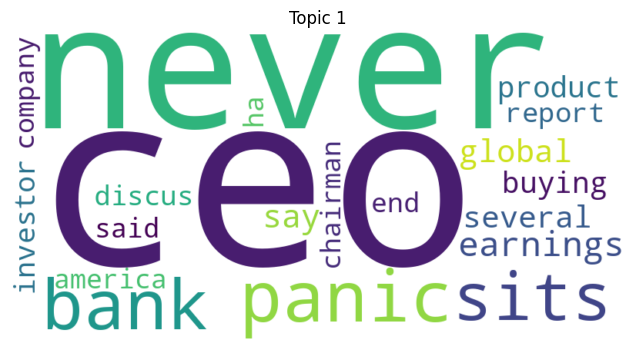

Topic 2: Probability 0.011113320477306843


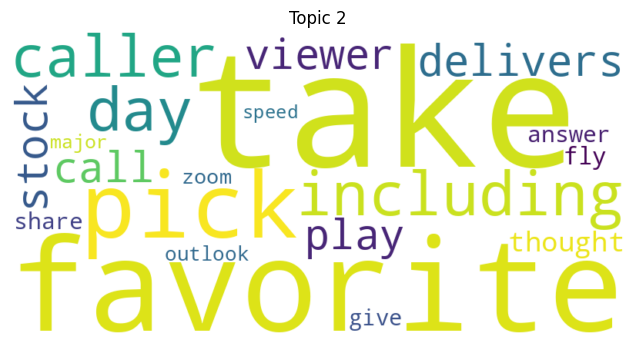

Topic 3: Probability 0.011112738400697708


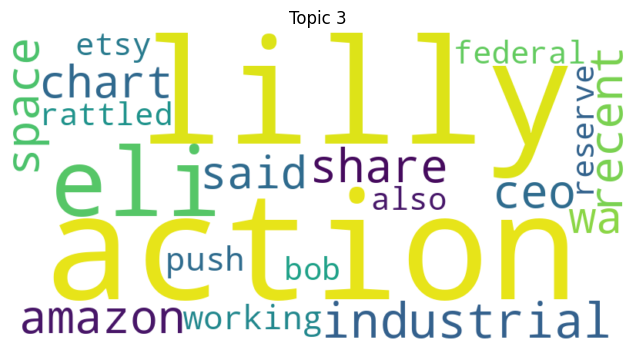

Topic 4: Probability 0.011113578453660011


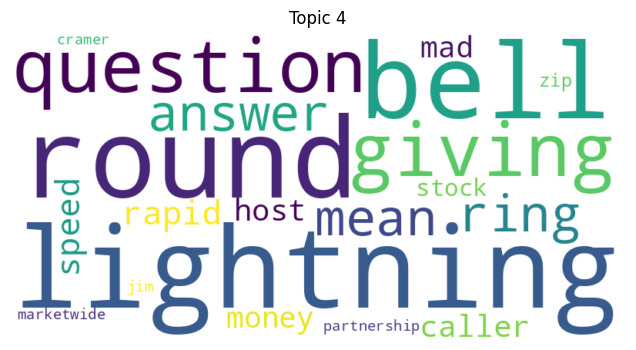

Topic 5: Probability 0.011113489046692848


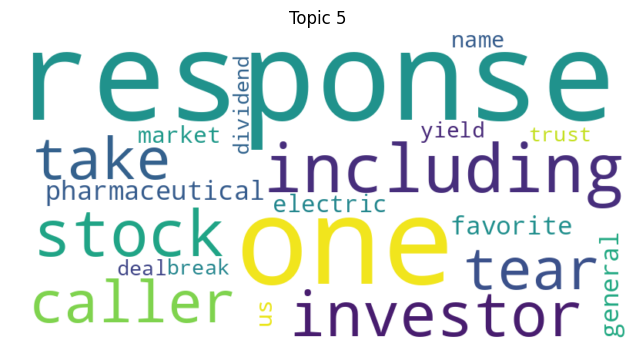

Topic 6: Probability 0.011114031076431274


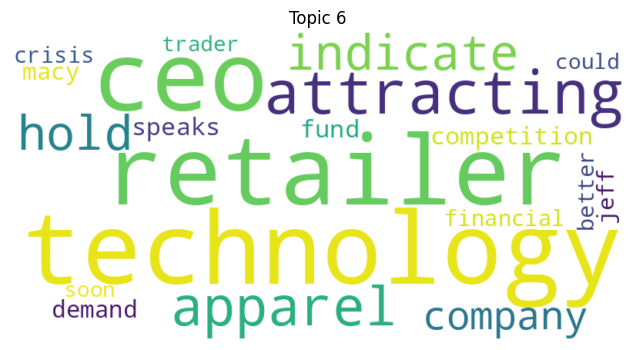

Topic 7: Probability 0.011114309541881084


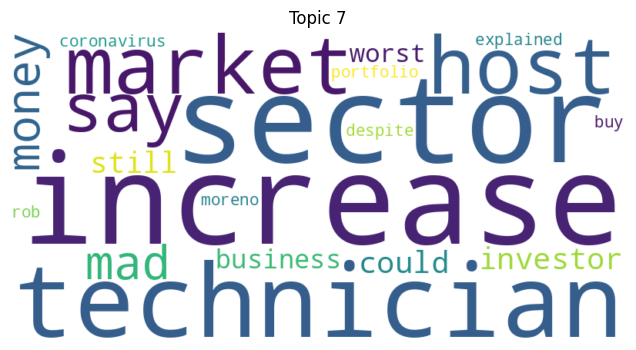

Topic 8: Probability 0.8999758958816528


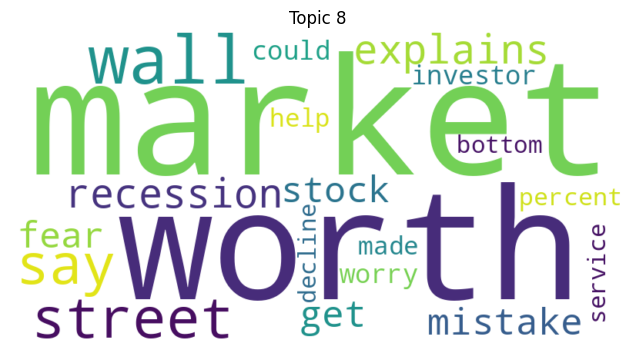

Topic 9: Probability 0.011113241314888


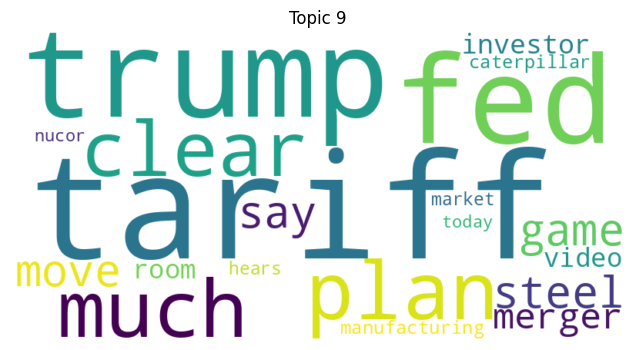

Test Document 3 Topics:
Topic 0: Probability 0.3387434482574463


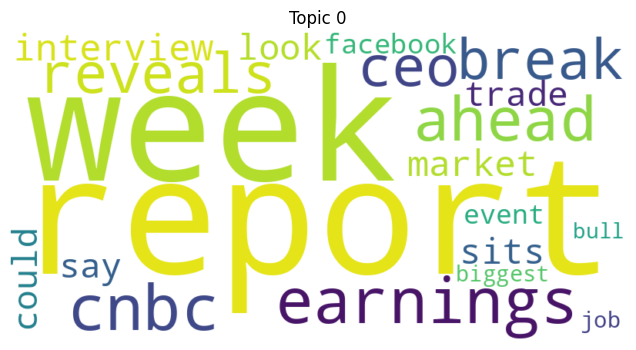

Topic 5: Probability 0.17720851302146912


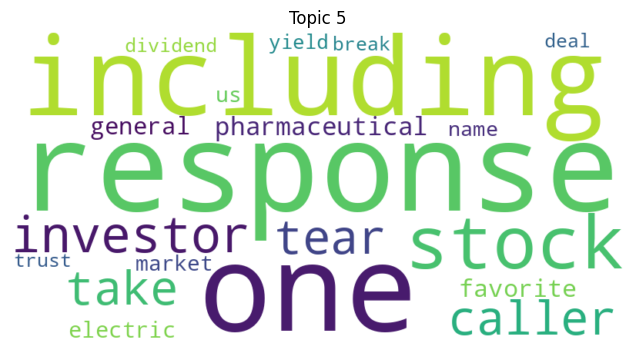

Topic 6: Probability 0.1885376274585724


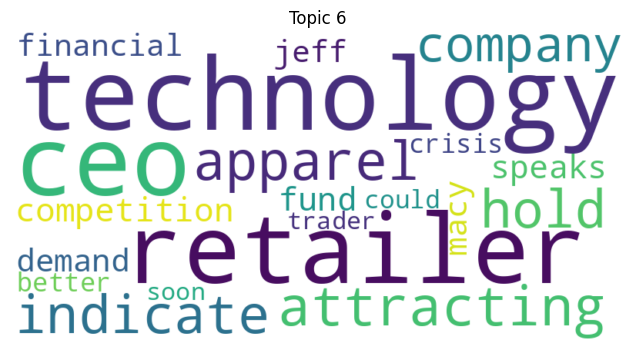

Topic 7: Probability 0.24548913538455963


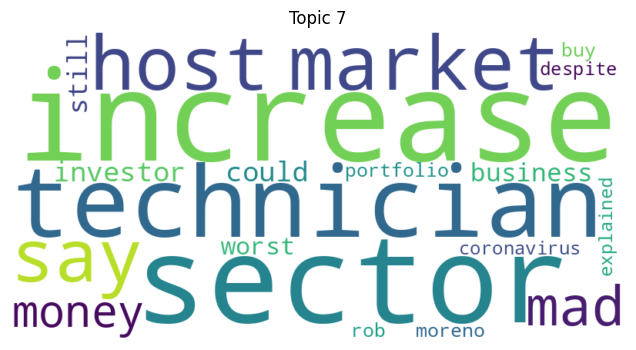

Test Document 4 Topics:
Topic 2: Probability 0.9181771278381348


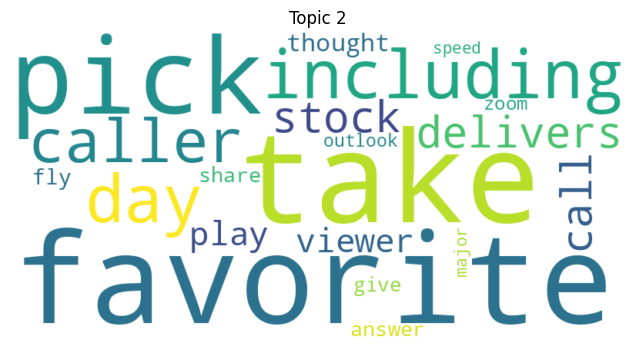

Test Document 5 Topics:
Topic 2: Probability 0.21240989863872528


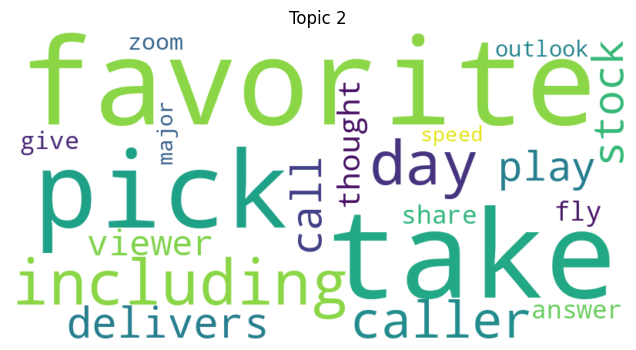

Topic 3: Probability 0.11751727759838104


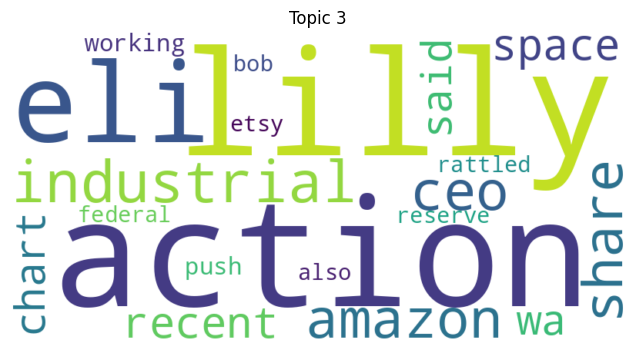

Topic 5: Probability 0.2385392040014267


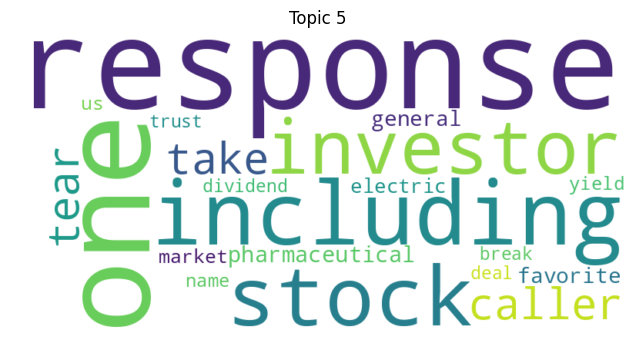

Topic 8: Probability 0.3815065324306488


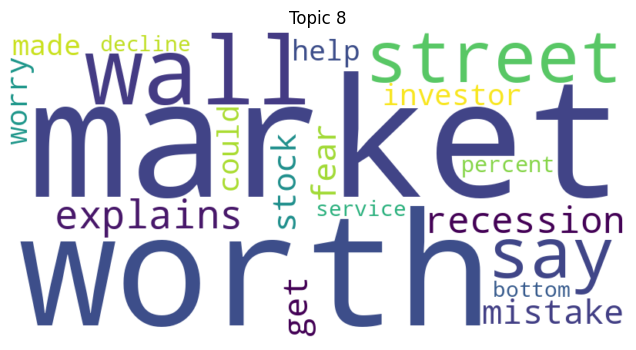

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


#this function to create a word cloud for a given topic distribution
def create_word_cloud(topic_distribution, topic_id):
    words = lda_model.show_topic(topic_id, topn=20)  # Get the top 20 words for the topic
    word_dict = {word: prob for word, prob in words}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_id}")
    plt.axis("off")
    plt.show()

# Visualize topics for the first 5 test documents
for i in range(5):
    print(f"Test Document {i + 1} Topics:")
    for topic_id, topic_prob in test_topic_predictions[i]:
        print(f"Topic {topic_id}: Probability {topic_prob}")
        create_word_cloud(topic_prob, topic_id)


In [ ]:
# Define a function to get the top topic for each document
def get_top_topic(doc_topic_distribution):
    return max(doc_topic_distribution, key=lambda item: item[1])

# Print the top topics for the test documents
for i, doc_topics in enumerate(test_topic_predictions):
    top_topic = get_top_topic(doc_topics)
    print(f"Test Document {i + 1} Top Topic: Topic {top_topic[0]}, Probability: {top_topic[1]:.4f}")


Test Document 1 Top Topic: Topic 0, Probability: 0.4583
Test Document 2 Top Topic: Topic 8, Probability: 0.9000
Test Document 3 Top Topic: Topic 0, Probability: 0.3387
Test Document 4 Top Topic: Topic 2, Probability: 0.9182
Test Document 5 Top Topic: Topic 8, Probability: 0.3815
Test Document 6 Top Topic: Topic 7, Probability: 0.3564
Test Document 7 Top Topic: Topic 5, Probability: 0.3446
Test Document 8 Top Topic: Topic 4, Probability: 0.2958
Test Document 9 Top Topic: Topic 8, Probability: 0.4796
Test Document 10 Top Topic: Topic 3, Probability: 0.2846
Test Document 11 Top Topic: Topic 2, Probability: 0.3214
Test Document 12 Top Topic: Topic 7, Probability: 0.3025
Test Document 13 Top Topic: Topic 5, Probability: 0.3415
Test Document 14 Top Topic: Topic 0, Probability: 0.5507
Test Document 15 Top Topic: Topic 9, Probability: 0.3016
Test Document 16 Top Topic: Topic 0, Probability: 0.3527
Test Document 17 Top Topic: Topic 0, Probability: 0.5491
Test Document 18 Top Topic: Topic 8, Pro

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

perplexity = lda_model.log_perplexity(test_corpus)

print(f'Perplexity: {perplexity}')


Perplexity: -15.384467673338234


#Compute coherence score to evaluate the model

In [ ]:
# Compute coherence score to evaluate the model
coherence_model = CoherenceModel(model=lda_model, texts=all_words, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
normalized_coherence_score = round(coherence_score, 4)
print(f'Normalized Coherence Score: {normalized_coherence_score}')

Normalized Coherence Score: 0.4297


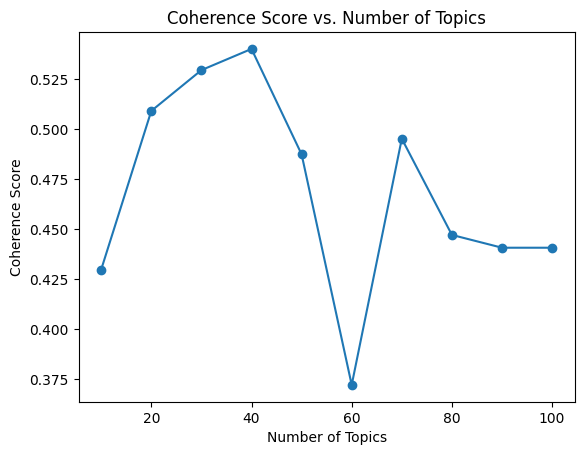

In [ ]:
import matplotlib.pyplot as plt

# Define the number of topics and their corresponding coherence scores
num_topics = [10, 20, 30, 40, 50, 60, 70, 80, 90,100]
coherence_scores = [0.4297, 0.509, 0.5294, 0.54, 0.4873, 0.372, 0.4951, 0.447, 0.4406, 0.4406]

# Create a line plot
plt.plot(num_topics, coherence_scores, marker='o')



# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')

# Show the plot
plt.show()


In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from sklearn.model_selection import KFold
import numpy as np

num_folds = 5

coherence_scores = []

# Define a range of N values (number of topics)
num_topics_list = [ 10, 15, 20, 30,  40,  50, 50,  70, 80,  90, 100]

# Initialize k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for num_topics in num_topics_list:
    print(f"Evaluating model with {num_topics} topics...")
    for train_index, test_index in kf.split(corpus_tfidf):
        train_corpus = [corpus_tfidf[i] for i in train_index]
        test_corpus = [corpus_tfidf[i] for i in test_index]

        # Train an LDA model
        lda_model = LdaModel(corpus=train_corpus, num_topics=num_topics, id2word=dictionary)

        # Calculate coherence score
        coherence_model = CoherenceModel(model=lda_model, texts=all_words, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)

        print(f"Coherence Score: {coherence_score}")

# Calculate average coherence score for each k value
average_coherence_scores = []
for i in range(len(num_topics_list)):
    start_idx = i * num_folds
    end_idx = (i + 1) * num_folds
    average_score = np.mean(coherence_scores[start_idx:end_idx])
    average_coherence_scores.append(average_score)

# Find the best number of topics based on the highest average coherence score
best_num_topics = num_topics_list[np.argmax(average_coherence_scores)]

print(f"The best number of topics is: {best_num_topics}")


Evaluating model with 10 topics...


Coherence Score: 0.3395234867324037


Coherence Score: 0.36829114479525843


Coherence Score: 0.3745218174484994


Coherence Score: 0.37452190142786623


Coherence Score: 0.37858116882379733
Evaluating model with 15 topics...


Coherence Score: 0.32100164118825236


Coherence Score: 0.3435212322520161


Coherence Score: 0.41207894509487


Coherence Score: 0.33381461173715615


Coherence Score: 0.32592597374477944
Evaluating model with 20 topics...


Coherence Score: 0.3789021681364141


Coherence Score: 0.3988462941382018


Coherence Score: 0.39210119091201057


Coherence Score: 0.34244636491168234


Coherence Score: 0.3640963619667267
Evaluating model with 30 topics...


Coherence Score: 0.3855908424524046


Coherence Score: 0.41920909645873394


Coherence Score: 0.41414079871936343


Coherence Score: 0.37945908046838794


Coherence Score: 0.40514340600688087
Evaluating model with 40 topics...


Coherence Score: 0.4256571770989416


Coherence Score: 0.43635264215378344


Coherence Score: 0.43195975551468224


Coherence Score: 0.422442075209979


Coherence Score: 0.4172484347801527
Evaluating model with 50 topics...


Coherence Score: 0.4834061025061049


Coherence Score: 0.49248798456035664


Coherence Score: 0.48420243139682495


Coherence Score: 0.4701738911736333


Coherence Score: 0.47413071259699996
Evaluating model with 50 topics...


Coherence Score: 0.48051581431155405


Coherence Score: 0.4799298924687313


Coherence Score: 0.4877800046972065


Coherence Score: 0.4762724961352946


Coherence Score: 0.45889119973784503
Evaluating model with 70 topics...


Coherence Score: 0.4969514152542131


Coherence Score: 0.4898845094335568
Coherence Score: 0.4882532331365719


Coherence Score: 0.49955771966408147


Coherence Score: 0.469294203822015
Evaluating model with 80 topics...


Coherence Score: 0.4471935305116085


Coherence Score: 0.4471935305116085


Coherence Score: 0.4405629515651738


Coherence Score: 0.4405629515651738


Coherence Score: 0.4405629515651738
Evaluating model with 90 topics...


Coherence Score: 0.44056295156517383


Coherence Score: 0.44056295156517383


Coherence Score: 0.44056295156517383


Coherence Score: 0.44056295156517383


Coherence Score: 0.44056295156517383
Evaluating model with 100 topics...


Coherence Score: 0.44056295156517394


Coherence Score: 0.44056295156517394


Coherence Score: 0.44056295156517394


Coherence Score: 0.44056295156517394
Coherence Score: 0.44056295156517394
The best number of topics is: 70


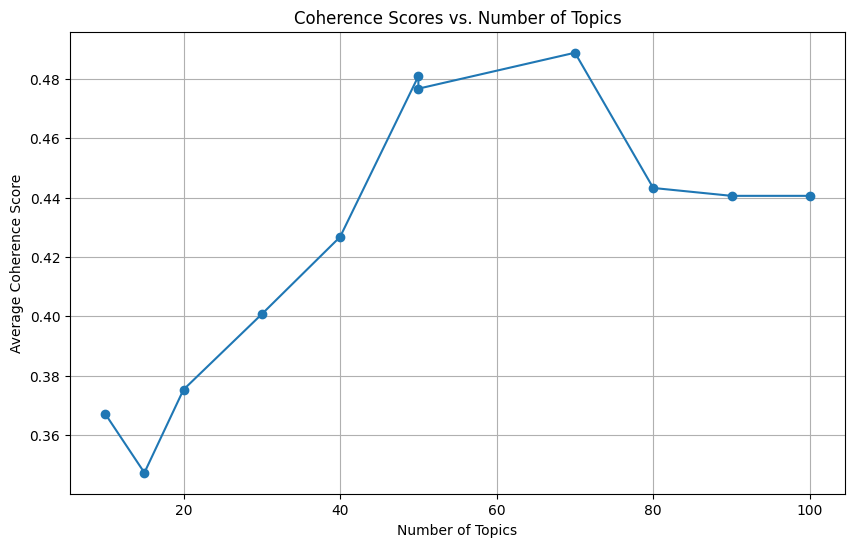

In [ ]:
import matplotlib.pyplot as plt

# Calculate average coherence score for each k value
average_coherence_scores = []
for i in range(len(num_topics_list)):
    start_idx = i * num_folds
    end_idx = (i + 1) * num_folds
    average_score = np.mean(coherence_scores[start_idx:end_idx])
    average_coherence_scores.append(average_score)

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, average_coherence_scores, marker='o', linestyle='-')
plt.title('Coherence Scores vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Average Coherence Score')
plt.grid(True)

# Show the plot
plt.show()


#Topic inference

In [ ]:
topic_inferences = []

for doc_bow in corpus:
    document_topics = lda_model.get_document_topics(doc_bow)
    topic_inferences.append(document_topics)

# Print topic inferences for each document
for doc_idx, document_topics in enumerate(topic_inferences):
    print(f"Document {doc_idx + 1} - Topic Inference:")
    for topic_id, topic_prob in document_topics:
        print(f"Topic {topic_id} - Probability: {topic_prob:.4f}")
    print()



Document 1 - Topic Inference:

Document 2 - Topic Inference:

Document 3 - Topic Inference:

Document 4 - Topic Inference:

Document 5 - Topic Inference:

Document 6 - Topic Inference:

Document 7 - Topic Inference:

Document 8 - Topic Inference:

Document 9 - Topic Inference:

Document 10 - Topic Inference:

Document 11 - Topic Inference:

Document 12 - Topic Inference:

Document 13 - Topic Inference:

Document 14 - Topic Inference:

Document 15 - Topic Inference:

Document 16 - Topic Inference:

Document 17 - Topic Inference:

Document 18 - Topic Inference:

Document 19 - Topic Inference:

Document 20 - Topic Inference:

Document 21 - Topic Inference:

Document 22 - Topic Inference:

Document 23 - Topic Inference:

Document 24 - Topic Inference:

Document 25 - Topic Inference:

Document 26 - Topic Inference:

Document 27 - Topic Inference:

Document 28 - Topic Inference:

Document 29 - Topic Inference:

Document 30 - Topic Inference:

Document 31 - Topic Inference:

Document 32 - Top

In [ ]:
# Assuming `topic_inferences` contains the topic inferences for each document
num_topics = 10
# Initialize a list to store the total probabilities for each topic
total_probabilities = [0] * num_topics

# Initialize a counter to keep track of the number of documents
num_documents = len(topic_inferences)

# Loop through each document's topic inferences
for document_topics in topic_inferences:
    # Accumulate the probabilities for each topic
    for topic_id, topic_prob in document_topics:
        total_probabilities[topic_id] += topic_prob

# Calculate the average probability for each topic
average_probabilities = [total_prob / num_documents for total_prob in total_probabilities]

# Print average probability for each topic
for topic_id, avg_prob in enumerate(average_probabilities):
    print(f"Topic {topic_id} - Average Probability: {avg_prob:.4f}")


Topic 0 - Average Probability: 0.0000
Topic 1 - Average Probability: 0.0000
Topic 2 - Average Probability: 0.0000
Topic 3 - Average Probability: 0.0000
Topic 4 - Average Probability: 0.0000
Topic 5 - Average Probability: 0.0000
Topic 6 - Average Probability: 0.0000
Topic 7 - Average Probability: 0.0000
Topic 8 - Average Probability: 0.0000
Topic 9 - Average Probability: 0.0000


#Topic conversion to Time Series Data

In [ ]:
# Create a function to get topics for each document
def get_document_topics(text):
    bow = dictionary.doc2bow(preprocess_text(text))
    return lda_model.get_document_topics(bow)

In [ ]:
import warnings

# Ignore a specific warning by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import warnings
import pandas as pd

# Ignore a specific warning by category
pd.options.mode.chained_assignment = None  # default='warn'
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

<ipython-input-165-0027196467d0>:6: FutureWarning: Parsed string " 7:51  PM ET Fri, 17 July 2020" included an un-recognized timezone "ET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['Time'] = pd.to_datetime(data['Time'])
<ipython-input-165-0027196467d0>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])
<ipython-input-165-0027196467d0>:6: FutureWarning: Parsed string " 7:33  PM ET Fri, 17 July 2020" included an un-recognized timezone "ET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['Time'] = pd.to_datetime(

In [ ]:
weekly_data = data.resample('W').agg({'Description': ' '.join})
 #Get topics for each week
weekly_topics = weekly_data['Description'].apply(get_document_topics)

In [ ]:
print(data.columns)

Index(['Headlines', 'Description'], dtype='object')


In [ ]:
# Convert weekly_topics to a DataFrame
topics_df = pd.DataFrame(weekly_topics.tolist(), index=weekly_topics.index)

<ipython-input-169-34fc2441cc8e>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  daily_topics_df = daily_topics_df.applymap(lambda x: x[1])


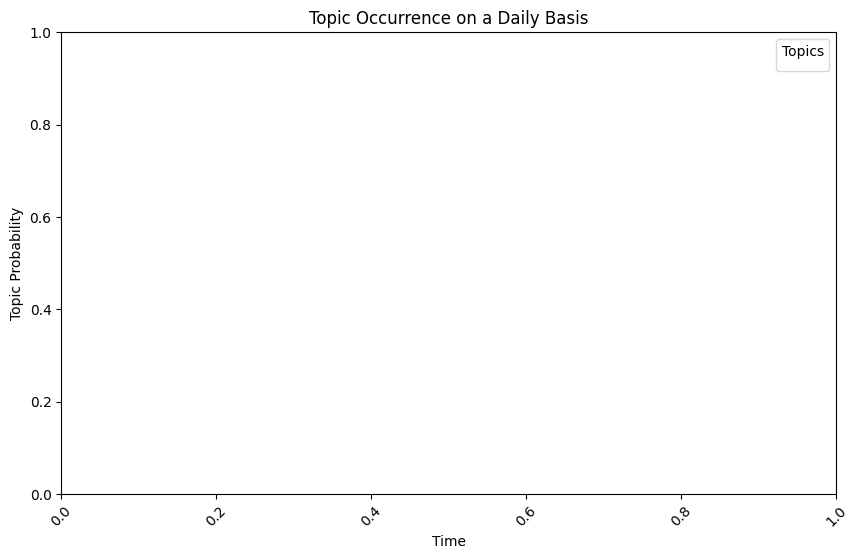

In [ ]:
# Convert weekly_topics to a DataFrame
topics_df = pd.DataFrame(weekly_topics.tolist(), index=weekly_topics.index)

# Resample the DataFrame to a daily frequency and forward-fill missing values
daily_topics_df = topics_df.resample('D').ffill()

# Drop rows with any remaining missing values
daily_topics_df.dropna(inplace=True)

# Convert tuples to topic probabilities
daily_topics_df = daily_topics_df.applymap(lambda x: x[1])

# Plot each topic's occurrence on a daily basis using a line graph
plt.figure(figsize=(10, 6))
for topic in daily_topics_df.columns:
    plt.plot(daily_topics_df.index, daily_topics_df[topic], label=f"Topic {topic}")

plt.xlabel('Time')
plt.ylabel('Topic Probability')
plt.title('Topic Occurrence on a Daily Basis')
plt.legend(title='Topics', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Create a separate plot for each the topic
num_topics = daily_topics_df.shape[1]
fig, axs = plt.subplots(num_topics, 1, figsize=(10, 5*num_topics), sharex=True)

# Plot each topic's occurrence on a daily basis using a line graph
for i, topic in enumerate(daily_topics_df.columns):
    axs[i].plot(daily_topics_df.index, daily_topics_df[topic])
    axs[i].set_ylabel(f'Topic {topic} Probability')
    axs[i].grid(True)
    axs[i].set_title(f'Topic {topic}')

plt.xlabel('Time')
plt.suptitle('Topic Occurrence on a Daily Basis', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the subplot layout
plt.show()

ValueError: ignored

<Figure size 1000x0 with 0 Axes>

In [ ]:
# Plot a single topic's occurrence on a daily basis using a line graph
topic_to_plot = 0  # Change this to the topic index you want to plot
topic_label = daily_topics_df.columns[topic_to_plot]

plt.figure(figsize=(10, 6))
plt.plot(daily_topics_df.index, daily_topics_df[topic_label])
plt.xlabel('Time')
plt.ylabel(f'Topic {topic_label} Probability')
plt.title(f'Topic {topic_label} Occurrence on a Daily Basis')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Calculating z-scores to find the spikes in topics

In [ ]:
mean = daily_topics_df.mean()
std_dev = daily_topics_df.std()

In [ ]:
z_scores = (daily_topics_df - mean) / std_dev

In [ ]:
threshold = 1  # Adjust as needed
spike_indices = z_scores[z_scores > threshold].stack().index
spikes = daily_topics_df.loc[spike_indices.get_level_values('Time')]

In [ ]:
print(z_scores)


In [ ]:

threshold = 1  # Adjust as needed
spike_indices = z_scores[z_scores > threshold].stack().index
spikes = z_scores.loc[spike_indices.get_level_values('Time')]

# Print the Z-scores that meet the threshold condition
print(spikes)

In [ ]:
threshold = 1  # Adjust as needed
spike_indices = z_scores[z_scores > threshold].stack().index
spikes = z_scores.loc[spike_indices.get_level_values('Time')]

# Print the Z-scores corresponding to the spike indices
print(spikes)

#Granger causality

If the p-value is less than the chosen significance level (e.g., 0.05), it indicates that there is strong evidence to reject the null hypothesis, meaning that there is Granger causality from the first topic to the second topic.

In [ ]:
import warnings

# Ignore a specific warning by category
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
# Find Granger causality of each topic with other topics
num_topics = daily_topics_df.shape[1]
granger_causality_results = {}

for topic in daily_topics_df.columns:
    granger_causality_results[topic] = {}
    for other_topic in daily_topics_df.columns:
        if topic != other_topic:
            # Combine the two topics' data to perform the Granger causality test
            combined_data = pd.concat([daily_topics_df[topic], daily_topics_df[other_topic]], axis=1)
            results = grangercausalitytests(combined_data, maxlag=1, verbose=False)

            # Get the p-value for the Granger causality test
            p_value = results[1][0]['ssr_ftest'][1]
            granger_causality_results[topic][other_topic] = p_value

# Print the Granger causality results
for topic in granger_causality_results:
    for other_topic, p_value in granger_causality_results[topic].items():
        print(f"Granger causality: {topic} -> {other_topic}, p-value: {p_value}")

In [ ]:
import seaborn as sns
# Convert the Granger causality results to a DataFrame
granger_df = pd.DataFrame(granger_causality_results)

# Plot the Granger causality results as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(granger_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Granger Causality Heatmap")
plt.xlabel("Topics")
plt.ylabel("Topics")
plt.show()

In [ ]:
# Granger causality test results text
granger_results_text = """
Granger causality: 0 -> 1, p-value: 0.9192307143573671
Granger causality: 0 -> 2, p-value: 0.4686554949502165
Granger causality: 0 -> 3, p-value: 0.3860860534497621
Granger causality: 0 -> 4, p-value: 0.8514471521948144
Granger causality: 0 -> 5, p-value: 0.9677677688296414
Granger causality: 0 -> 6, p-value: 0.9894501918248467
Granger causality: 0 -> 7, p-value: 0.5349581167276914
Granger causality: 0 -> 8, p-value: 0.8561633591267181
Granger causality: 0 -> 9, p-value: 0.5560269958627242
Granger causality: 0 -> 10, p-value: 0.15023862148092487
Granger causality: 0 -> 11, p-value: 0.646232781467251
Granger causality: 0 -> 12, p-value: 0.2360226945633828
Granger causality: 0 -> 13, p-value: 0.9579570388780373
Granger causality: 0 -> 14, p-value: 0.377176959716631
Granger causality: 1 -> 0, p-value: 0.8244587256602899
Granger causality: 1 -> 2, p-value: 0.14622766334832446
Granger causality: 1 -> 3, p-value: 0.5241998312545626
Granger causality: 1 -> 4, p-value: 0.3554862264319498
Granger causality: 1 -> 5, p-value: 0.32968558695156347
Granger causality: 1 -> 6, p-value: 0.7743317476111788
Granger causality: 1 -> 7, p-value: 0.17409056278859245
Granger causality: 1 -> 8, p-value: 0.8616459204191115
Granger causality: 1 -> 9, p-value: 0.5831699033115062
Granger causality: 1 -> 10, p-value: 0.20960619928116672
Granger causality: 1 -> 11, p-value: 0.3266900349863028
Granger causality: 1 -> 12, p-value: 0.1142585988697327
Granger causality: 1 -> 13, p-value: 0.2704111595347358
Granger causality: 1 -> 14, p-value: 0.7062722388133416
Granger causality: 2 -> 0, p-value: 0.5987732701365847
Granger causality: 2 -> 1, p-value: 0.648663216151041
Granger causality: 2 -> 3, p-value: 0.5656408472974077
Granger causality: 2 -> 4, p-value: 0.059013376136218466
Granger causality: 2 -> 5, p-value: 0.2764596897493004
Granger causality: 2 -> 6, p-value: 0.836112944871187
Granger causality: 2 -> 7, p-value: 0.3217358685790611
Granger causality: 2 -> 8, p-value: 0.2540871898991238
Granger causality: 2 -> 9, p-value: 0.5070739301778433
Granger causality: 2 -> 10, p-value: 0.26781074777153474
Granger causality: 2 -> 11, p-value: 0.0626584759242948
Granger causality: 2 -> 12, p-value: 0.18573021993257616
Granger causality: 2 -> 13, p-value: 0.6261785544218966
Granger causality: 2 -> 14, p-value: 0.16978798953863483
Granger causality: 3 -> 0, p-value: 0.04989798322177592
Granger causality: 3 -> 1, p-value: 0.17890851133755614
Granger causality: 3 -> 2, p-value: 0.8145861421856017
Granger causality: 3 -> 4, p-value: 0.6932627946472283
Granger causality: 3 -> 5, p-value: 0.28048504876492586
Granger causality: 3 -> 6, p-value: 0.5771770861990505
Granger causality: 3 -> 7, p-value: 0.968235797046125
Granger causality: 3 -> 8, p-value: 0.6207908468689614
Granger causality: 3 -> 9, p-value: 0.4492604952998014
Granger causality: 3 -> 10, p-value: 0.6875160531464981
Granger causality: 3 -> 11, p-value: 0.36591313728874053
Granger causality: 3 -> 12, p-value: 0.9441469756936992
Granger causality: 3 -> 13, p-value: 0.5375022019068811
Granger causality: 3 -> 14, p-value: 0.5304262880695101
Granger causality: 4 -> 0, p-value: 0.10215633199310445
Granger causality: 4 -> 1, p-value: 0.541347200905614
Granger causality: 4 -> 2, p-value: 0.8300498136470931
Granger causality: 4 -> 3, p-value: 0.18587580651509691
Granger causality: 4 -> 5, p-value: 0.027210381955114098
Granger causality: 4 -> 6, p-value: 0.685031098097595
Granger causality: 4 -> 7, p-value: 0.30996320991119053
Granger causality: 4 -> 8, p-value: 0.8105731778245862
Granger causality: 4 -> 9, p-value: 0.9142477630809915
Granger causality: 4 -> 10, p-value: 0.015612593717372265
Granger causality: 4 -> 11, p-value: 0.517403878277582
Granger causality: 4 -> 12, p-value: 0.19065568495999968
Granger causality: 4 -> 13, p-value: 0.4023929637883512
Granger causality: 4 -> 14, p-value: 0.03362190174295112
Granger causality: 5 -> 0, p-value: 0.8001284662657794
Granger causality: 5 -> 1, p-value: 0.7810167099152379
Granger causality: 5 -> 2, p-value: 0.3791924109497953
Granger causality: 5 -> 3, p-value: 0.9282820011171101
Granger causality: 5 -> 4, p-value: 0.01985967273914351
Granger causality: 5 -> 6, p-value: 0.5666424559586974
Granger causality: 5 -> 7, p-value: 0.6854248995709291
Granger causality: 5 -> 8, p-value: 0.7200785895711781
Granger causality: 5 -> 9, p-value: 0.6280478785761388
Granger causality: 5 -> 10, p-value: 0.05881244896811296
Granger causality: 5 -> 11, p-value: 0.015838984002056033
Granger causality: 5 -> 12, p-value: 0.005371803481762779
Granger causality: 5 -> 13, p-value: 0.8688821292068447
Granger causality: 5 -> 14, p-value: 0.15858292286775744
Granger causality: 6 -> 0, p-value: 0.22303765630250108
Granger causality: 6 -> 1, p-value: 0.24818179602350326
Granger causality: 6 -> 2, p-value: 0.45559890298469363
Granger causality: 6 -> 3, p-value: 0.8392867758618784
Granger causality: 6 -> 4, p-value: 0.22787986831774396
Granger causality: 6 -> 5, p-value: 0.7270901801210594
Granger causality: 6 -> 7, p-value: 0.7918627379758357
Granger causality: 6 -> 8, p-value: 0.43267136437294473
Granger causality: 6 -> 9, p-value: 0.616643408572742
Granger causality: 6 -> 10, p-value: 0.34131145818332564
Granger causality: 6 -> 11, p-value: 0.8520237309304096
Granger causality: 6 -> 12, p-value: 0.2915375853501078
Granger causality: 6 -> 13, p-value: 0.2144181075169576
Granger causality: 6 -> 14, p-value: 0.9508665795051908
Granger causality: 7 -> 0, p-value: 0.6341728815074688
Granger causality: 7 -> 1, p-value: 0.30883770194824584
Granger causality: 7 -> 2, p-value: 0.2610918802236273
Granger causality: 7 -> 3, p-value: 0.8473926392753802
Granger causality: 7 -> 4, p-value: 0.7775324561248388
Granger causality: 7 -> 5, p-value: 0.7823125773703378
Granger causality: 7 -> 6, p-value: 0.8644099254317898
Granger causality: 7 -> 8, p-value: 0.7800224979842768
Granger causality: 7 -> 9, p-value: 0.7800669325816494
Granger causality: 7 -> 10, p-value: 0.4025951444207053
Granger causality: 7 -> 11, p-value: 0.20850440376705567
Granger causality: 7 -> 12, p-value: 0.4975192012302073
Granger causality: 7 -> 13, p-value: 0.9049106693937736
Granger causality: 7 -> 14, p-value: 0.7816420382572546
Granger causality: 8 -> 0, p-value: 0.6750266673700576
Granger causality: 8 -> 1, p-value: 0.22834829327099349
Granger causality: 8 -> 2, p-value: 0.9521805683134319
Granger causality: 8 -> 3, p-value: 0.3427742063748034
Granger causality: 8 -> 4, p-value: 0.5044880268613378
Granger causality: 8 -> 5, p-value: 0.7142460786871467
Granger causality: 8 -> 6, p-value: 0.6179951331307763
Granger causality: 8 -> 7, p-value: 0.7615372616100736
Granger causality: 8 -> 9, p-value: 0.03539817794195777
Granger causality: 8 -> 10, p-value: 0.31775032865841907
Granger causality: 8 -> 11, p-value: 0.7739587402082473
Granger causality: 8 -> 12, p-value: 0.3711690907927202
Granger causality: 8 -> 13, p-value: 0.3979070648983909
Granger causality: 8 -> 14, p-value: 0.6378035809673693
Granger causality: 9 -> 0, p-value: 0.6168740311509475
Granger causality: 9 -> 1, p-value: 0.5079738038422237
Granger causality: 9 -> 2, p-value: 0.20782873650837033
Granger causality: 9 -> 3, p-value: 0.27020171593020426
Granger causality: 9 -> 4, p-value: 0.5054343036152324
Granger causality: 9 -> 5, p-value: 0.05061821647960971
Granger causality: 9 -> 6, p-value: 0.7174295945891969
Granger causality: 9 -> 7, p-value: 0.819080086396966
Granger causality: 9 -> 8, p-value: 0.8889608871272277
Granger causality: 9 -> 10, p-value: 0.17556288785733568
Granger causality: 9 -> 11, p-value: 0.5862536272525558
Granger causality: 9 -> 12, p-value: 0.6384414230465718
Granger causality: 9 -> 13, p-value: 0.7901632895071694
Granger causality: 9 -> 14, p-value: 0.3764515152313248
Granger causality: 10 -> 0, p-value: 0.1211180037397693
Granger causality: 10 -> 1, p-value: 0.5935618187778935
Granger causality: 10 -> 2, p-value: 0.17517912974574562
Granger causality: 10 -> 3, p-value: 0.3681777591050841
Granger causality: 10 -> 4, p-value: 0.044696246681348695
Granger causality: 10 -> 5, p-value: 0.18100311474990746
Granger causality: 10 -> 6, p-value: 0.7190873276831745
Granger causality: 10 -> 7, p-value: 0.9471781055570292
Granger causality: 10 -> 8, p-value: 0.5619184409513238
Granger causality: 10 -> 9, p-value: 0.19315644180335978
Granger causality: 10 -> 11, p-value: 0.5154051986685916
Granger causality: 10 -> 12, p-value: 0.23409506429216442
Granger causality: 10 -> 13, p-value: 0.7861386258810319
Granger causality: 10 -> 14, p-value: 0.4116123454784162
Granger causality: 11 -> 0, p-value: 0.4227397317701297
Granger causality: 11 -> 1, p-value: 0.17193356579961816
Granger causality: 11 -> 2, p-value: 0.7779289564590853
Granger causality: 11 -> 3, p-value: 0.5819875468402886
Granger causality: 11 -> 4, p-value: 0.2314212665042444
Granger causality: 11 -> 5, p-value: 0.7736524031457901
Granger causality: 11 -> 6, p-value: 0.9070343571846394
Granger causality: 11 -> 7, p-value: 0.11526377029896306
Granger causality: 11 -> 8, p-value: 0.6519350288008143
Granger causality: 11 -> 9, p-value: 0.9968811337963226
Granger causality: 11 -> 10, p-value: 0.3051626959609363
Granger causality: 11 -> 12, p-value: 0.12694659182689155
Granger causality: 11 -> 13, p-value: 0.5448103520122628
Granger causality: 11 -> 14, p-value: 0.6928619443969823
Granger causality: 12 -> 0, p-value: 0.2684802983692346
Granger causality: 12 -> 1, p-value: 0.8025093835838735
Granger causality: 12 -> 2, p-value: 0.41153359685697233
Granger causality: 12 -> 3, p-value: 0.6758589776591535
Granger causality: 12 -> 4, p-value: 0.001238201440476619
Granger causality: 12 -> 5, p-value: 0.018317559928121802
Granger causality: 12 -> 6, p-value: 0.8749243495304885
Granger causality: 12 -> 7, p-value: 0.9887230857544356
Granger causality: 12 -> 8, p-value: 0.5195116650995736
Granger causality: 12 -> 9, p-value: 0.24106385618383602
Granger causality: 12 -> 10, p-value: 0.9654259357832149
Granger causality: 12 -> 11, p-value: 0.6524842591636222
Granger causality: 12 -> 13, p-value: 0.5498025521985743
Granger causality: 12 -> 14, p-value: 0.17440612319452975
Granger causality: 13 -> 0, p-value: 0.961629866337601
Granger causality: 13 -> 1, p-value: 0.21969535104028567
Granger causality: 13 -> 2, p-value: 0.6457320403909449
Granger causality: 13 -> 3, p-value: 0.4483836944365234
Granger causality: 13 -> 4, p-value: 0.5863670541434631
Granger causality: 13 -> 5, p-value: 0.11796043240604498
Granger causality: 13 -> 6, p-value: 0.12149416096335336
Granger causality: 13 -> 7, p-value: 0.5675458733834235
Granger causality: 13 -> 8, p-value: 0.4319106826384992
Granger causality: 13 -> 9, p-value: 0.3197202236777179
Granger causality: 13 -> 10, p-value: 0.4854224114971428
Granger causality: 13 -> 11, p-value: 0.12570610161718224
Granger causality: 13 -> 12, p-value: 0.9936870620604443
Granger causality: 13 -> 14, p-value: 0.42859373378325727
Granger causality: 14 -> 0, p-value: 0.7840865117996701
Granger causality: 14 -> 1, p-value: 0.5693199444459929
Granger causality: 14 -> 2, p-value: 0.2294252799500841
Granger causality: 14 -> 3, p-value: 0.9435483658034673
Granger causality: 14 -> 4, p-value: 0.21006606059732408
Granger causality: 14 -> 5, p-value: 0.2472437865898906
Granger causality: 14 -> 6, p-value: 0.5353303408414968
Granger causality: 14 -> 7, p-value: 0.9598781871135973
Granger causality: 14 -> 8, p-value: 0.8105331703756853
Granger causality: 14 -> 9, p-value: 0.3496938320738595
Granger causality: 14 -> 10, p-value: 0.6567862882939772
Granger causality: 14 -> 11, p-value: 0.8472258615318278
Granger causality: 14 -> 12, p-value: 0.23368974620321634
Granger causality: 14 -> 13, p-value: 0.8372701797519833
"""

# this code split the  results text into lines
results_lines = granger_results_text.strip().split("\n")

# Initialize a list to store significant Granger causality pairs
significant_pairs = []

# Significance level
significance_level = 0.05

# Loop through the results lines
for line in results_lines:
    # Extract the p-value from the line
    p_value = float(line.split("p-value:")[1].strip())

    # If p-value is less than or equal to the significance level, then the Granger causality is significant
    if p_value <= significance_level:
        # Extract the topics from the line
        topics = line.split("->")
        source_topic = topics[0].strip()
        target_topic = topics[1].split(",")[0].strip()

        # Append the significant pair to the list
        significant_pairs.append((source_topic, target_topic))

# Print the significant Granger causality pairs
for cause, effect in significant_pairs:
    print(f"Granger causality exists from Topic {cause} to Topic {effect}")




#Sentiment Analysis

> This section of sentiment analysis applied to topics derived from a Latent Dirichlet Allocation (LDA) model. This code snippet processes a collection of documents, calculates their sentiment scores using the VADER sentiment analysis tool, and then associates these sentiment scores with the dominant topic assigned to each document by the LDA model. Finally, it calculates and prints the average sentiment scores for each topic.

*   initializing an empty dictionary
*   obtains the topic probabilities for the document using the LDA model
*   calculates the average sentiment scores for each topic
*   List item






In [ ]:
import gensim
import pandas as pd
from gensim import models
from gensim import corpora
from textblob import TextBlob
from collections import defaultdict

data
# Create a DataFrame
data_df = pd.DataFrame(data)

# Define the dictionary and LDA model (replace with your actual dictionary and model)
dictionary
lda_model

# Initialize sentiment dictionaries
sentiment_cause = {}
sentiment_effect = {}

# Define topic indices for cause and effect
EFFECT_TOPIC = 0
CAUSE_TOPIC = 6

# Iterate through the DataFrame rows
for date, row in data_df.iterrows():
    date_str = date.strftime("%Y-%m-%d")  # Convert the datetime index to a string in time format of the data
    text_data = row['Description']

    # Calculate sentiment score using TextBlob
    sent_score = round(TextBlob(text_data).sentiment.polarity, 2)

    # Convert text data to bag of words
    bow_text = dictionary.doc2bow(text_data.split())

    # Get the topic distribution
    topic_dist = lda_model[bow_text]

    # Find the topic with the highest score
    if not topic_dist:
        continue

    top_topic = max(topic_dist, key=lambda x: x[1])
    topic_index = top_topic[0]

    # Update sentiment dictionaries based on the topic
    if topic_index == EFFECT_TOPIC:
        sentiment_effect[date_str] = sentiment_effect.get(date_str, 0) + sent_score
    elif topic_index == CAUSE_TOPIC:
        sentiment_cause[date_str] = sentiment_cause.get(date_str, 0) + sent_score

print("Sentiment scores for EFFECT_TOPIC:")
for date, score in sentiment_effect.items():
    print(f"Date: {date}, Score: {score}")

print("\nSentiment scores for CAUSE_TOPIC:")
for date, score in sentiment_cause.items():
    print(f"Date: {date}, Score: {score}")

In [ ]:
import re

text = """
Date: 2020-07-17, Score: -0.41
Date: 2020-07-16, Score: -0.41
Date: 2020-07-15, Score: -0.41
Date: 2020-07-14, Score: -0.41
Date: 2020-07-13, Score: -0.7
Date: 2020-07-02, Score: -0.41
Date: 2020-07-01, Score: -0.72
Date: 2020-06-30, Score: -0.41
Date: 2020-06-29, Score: -0.41
Date: 2020-06-25, Score: -0.53
Date: 2020-06-24, Score: -0.41
Date: 2020-06-23, Score: -0.41
Date: 2020-06-22, Score: -0.41
Date: 2020-06-18, Score: -0.41
Date: 2020-06-17, Score: -0.41
Date: 2020-06-16, Score: -0.41
Date: 2020-06-15, Score: -0.41
Date: 2020-06-12, Score: -0.41
Date: 2020-06-11, Score: -0.41
Date: 2020-06-10, Score: -0.41
Date: 2020-06-09, Score: -0.41
Date: 2020-06-04, Score: -0.41
Date: 2020-06-03, Score: -0.82
Date: 2020-06-02, Score: -0.82
Date: 2020-05-29, Score: -1.23
Date: 2020-05-27, Score: -0.41
Date: 2020-05-26, Score: -0.41
Date: 2020-05-21, Score: -0.41
Date: 2020-05-20, Score: -0.41
Date: 2020-05-19, Score: -0.41
Date: 2020-05-18, Score: -0.41
Date: 2020-05-16, Score: 0.2
Date: 2020-05-15, Score: -0.41
Date: 2020-05-14, Score: -0.41
Date: 2020-05-13, Score: -0.41
Date: 2020-05-12, Score: -0.41
Date: 2020-05-11, Score: -0.41
Date: 2020-05-07, Score: -0.41
Date: 2020-05-06, Score: -0.42
Date: 2020-05-05, Score: -0.47
Date: 2020-05-01, Score: -0.41
Date: 2020-04-30, Score: -0.41
Date: 2020-04-29, Score: -0.41
Date: 2020-04-28, Score: -0.41
Date: 2020-04-27, Score: 0.0
Date: 2020-04-24, Score: -0.41
Date: 2020-04-23, Score: -0.41
Date: 2020-04-22, Score: -0.41
Date: 2020-04-21, Score: -0.41
Date: 2020-04-20, Score: -0.41
Date: 2020-04-16, Score: -0.41
Date: 2020-04-15, Score: -0.41
Date: 2020-04-14, Score: -0.41
Date: 2020-04-13, Score: -0.41
Date: 2020-04-09, Score: -0.41
Date: 2020-04-08, Score: -0.72
Date: 2020-04-07, Score: -0.41
Date: 2020-04-06, Score: -0.41
Date: 2020-04-03, Score: -0.41
Date: 2020-04-02, Score: -0.41
Date: 2020-04-01, Score: -0.59
Date: 2020-03-31, Score: -0.41
Date: 2020-03-30, Score: -0.52
Date: 2020-03-27, Score: -0.41
Date: 2020-03-26, Score: -0.41
Date: 2020-03-25, Score: -0.41
Date: 2020-03-24, Score: -0.41
Date: 2020-03-20, Score: -0.41
Date: 2020-03-19, Score: -0.41
Date: 2020-03-18, Score: -0.41
Date: 2020-03-17, Score: -0.41
Date: 2020-03-16, Score: -0.41
Date: 2020-03-13, Score: -0.41
Date: 2020-03-12, Score: -0.41
Date: 2020-03-11, Score: -0.41
Date: 2020-03-10, Score: -0.41
Date: 2020-03-09, Score: -0.41
Date: 2020-03-06, Score: -0.41
Date: 2020-03-05, Score: -0.41
Date: 2020-03-03, Score: -0.41
Date: 2020-03-02, Score: -0.41
Date: 2020-02-28, Score: -0.41
Date: 2020-02-27, Score: -0.41
Date: 2020-02-25, Score: -0.41
Date: 2020-02-24, Score: -0.41
Date: 2020-02-21, Score: -0.41
Date: 2020-02-20, Score: -0.41
Date: 2020-02-19, Score: -0.41
Date: 2020-02-18, Score: -0.41
Date: 2020-02-14, Score: -0.41
Date: 2020-02-13, Score: -0.49
Date: 2020-02-12, Score: -0.41
Date: 2020-02-11, Score: -0.41
Date: 2020-02-10, Score: -0.41
Date: 2020-02-07, Score: -0.41
Date: 2020-02-06, Score: -0.8899999999999999
Date: 2020-02-05, Score: -0.41
Date: 2020-02-04, Score: -0.41
Date: 2020-02-03, Score: -0.41
Date: 2020-01-29, Score: -0.41
Date: 2020-01-28, Score: -0.41
Date: 2020-01-27, Score: -0.41
Date: 2020-01-22, Score: -0.62
Date: 2020-01-16, Score: -0.41
Date: 2020-01-14, Score: -0.41
Date: 2020-01-10, Score: -0.11
Date: 2020-01-08, Score: -0.08
Date: 2020-01-06, Score: -0.41
Date: 2020-01-03, Score: -0.41
Date: 2019-12-20, Score: -0.41
Date: 2019-12-19, Score: -0.61
Date: 2019-12-18, Score: -0.49
Date: 2019-12-17, Score: -0.41
Date: 2019-12-16, Score: -1.07
Date: 2019-12-13, Score: -0.41
Date: 2019-12-12, Score: -0.41
Date: 2019-12-11, Score: -0.41
Date: 2019-12-10, Score: -0.41
Date: 2019-12-09, Score: -0.41
Date: 2019-12-06, Score: -0.41
Date: 2019-12-05, Score: -0.45999999999999996
Date: 2019-12-04, Score: -0.41
Date: 2019-12-03, Score: -0.41
Date: 2019-11-25, Score: -0.19
Date: 2019-11-22, Score: -0.41
Date: 2019-11-21, Score: -0.41
Date: 2019-11-20, Score: -0.41
Date: 2019-11-19, Score: -0.41
Date: 2019-11-18, Score: -0.41
Date: 2019-11-14, Score: -0.41
Date: 2019-11-13, Score: -0.41
Date: 2019-11-12, Score: -0.41
Date: 2019-11-11, Score: -0.41
Date: 2019-11-08, Score: -0.24
Date: 2019-11-04, Score: -0.41
Date: 2019-11-01, Score: -0.41
Date: 2019-10-31, Score: -0.41
Date: 2019-10-30, Score: -0.41
Date: 2019-10-29, Score: -0.41
Date: 2019-10-25, Score: -0.41
Date: 2019-10-24, Score: -0.41
Date: 2019-10-22, Score: -0.41
Date: 2019-10-18, Score: -0.41
Date: 2019-10-16, Score: -0.41
Date: 2019-10-07, Score: 0.08
Date: 2019-10-03, Score: -0.62
Date: 2019-09-16, Score: -0.41
Date: 2019-09-05, Score: -0.41
Date: 2019-08-27, Score: -0.41
Date: 2019-08-22, Score: -0.23999999999999996
Date: 2019-08-20, Score: -0.82
Date: 2019-08-15, Score: -0.41
Date: 2019-08-14, Score: -0.41
Date: 2019-08-13, Score: -0.2
Date: 2019-07-30, Score: -0.41
Date: 2019-07-23, Score: 0.5
Date: 2019-07-10, Score: -0.31
Date: 2019-06-20, Score: -0.2
Date: 2019-06-11, Score: 0.09
Date: 2019-05-21, Score: -0.62
Date: 2019-05-14, Score: -0.82
Date: 2019-05-09, Score: -0.41
Date: 2019-05-02, Score: -0.41
Date: 2019-05-01, Score: -0.41
Date: 2019-04-25, Score: 0.15
Date: 2019-04-16, Score: -0.41
Date: 2019-04-10, Score: -0.41
Date: 2019-04-03, Score: 0.05
Date: 2019-03-13, Score: 0.5
Date: 2019-03-07, Score: 0.0
Date: 2019-02-15, Score: 0.0
Date: 2019-02-14, Score: 0.0
Date: 2019-02-12, Score: 0.0
Date: 2019-02-07, Score: 0.0
Date: 2019-02-05, Score: 0.0
Date: 2019-02-01, Score: 0.0
Date: 2019-01-30, Score: 0.0
Date: 2019-01-29, Score: -0.2
Date: 2019-01-08, Score: 0.6
Date: 2019-01-09, Score: 0.0
Date: 2019-01-07, Score: 0.0
Date: 2018-12-14, Score: 0.0
Date: 2018-08-07, Score: 0.0
Date: 2018-07-28, Score: 0.5
Date: 2018-07-11, Score: -0.2
Date: 2018-06-05, Score: 0.0
Date: 2018-04-24, Score: -0.2
Date: 2018-02-26, Score: -0.48
Date: 2018-01-26, Score: 0.25
Date: 2018-01-11, Score: 0.0
"""

# Define a regular expression pattern to extract dates and scores
pattern = r'Date: (\d{4}-\d{2}-\d{2}), Score: (-?\d+\.\d+)'

# Use re.findall to extract all matching dates and scores
matches = re.findall(pattern, text)

# Create lists to store dates and scores separately
dates = []
scores = []

# Iterate over the matches and extract dates and scores
for match in matches:
    date, score = match
    dates.append(date)
    scores.append(float(score))

# Print the extracted dates and scores
for date, score in zip(dates, scores):
    print(f"Date: {date}, Score: {score}")


In [ ]:
# Create a list of dictionaries for each match
data_list = [{'Date': date, 'Score': float(score)} for date, score in matches]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)


In [ ]:
print(df)

In [ ]:

granger_cause_effect_pairs = [
    (0, 6),
    (0, 7),
    (2, 7),
    (6, 0),
    (7, 2)
]

# Create a DataFrame
data_df = pd.DataFrame(data)

# Define the dictionary and LDA model (replace with your actual dictionary and model)
dictionary
lda_model

# Initialize sentiment dictionaries
sentiment_cause = {}
sentiment_effect = {}

# Iterate through the DataFrame rows
for date, row in data_df.iterrows():
    date_str = date.strftime("%Y-%m-%d")
    text_data = row['Description']

    # Calculate sentiment score using TextBlob
    sent_score = round(TextBlob(text_data).sentiment.polarity, 2)

    # Convert text data to bag of words
    bow_text = dictionary.doc2bow(text_data.split())

    # Get the topic distribution
    topic_dist = lda_model[bow_text]

    # Find the topic with the highest score
    if not topic_dist:
        continue

    top_topic = max(topic_dist, key=lambda x: x[1])
    topic_index = top_topic[0]

    # Check if the topic is in any Granger causality pair
    for cause_topic, effect_topic in granger_cause_effect_pairs:
        if topic_index == cause_topic:
            # Update sentiment dictionaries for the corresponding effect topic
            date_key = (date_str, cause_topic)
            sentiment_effect[date_key] = sentiment_effect.get(date_key, 0) + sent_score
        elif topic_index == effect_topic:
            # Update sentiment dictionaries for the corresponding cause topic
            date_key = (date_str, effect_topic)
            sentiment_cause[date_key] = sentiment_cause.get(date_key, 0) + sent_score + topic_id

# Print the sentiment scores associated with each cause and effect pair
print("Sentiment for Cause:")
print(sentiment_cause)

print("\nSentiment for Effect:")
print(sentiment_effect)


#Performing time series analysis on sentiment data involves identifying trends, seasonality, and patterns over time

In [ ]:
# Convert the 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
import pandas as pd

# Assuming you have the sentiment scores in a DataFrame
sentiment_data = pd.DataFrame({
    'Date': ['2020-07-17', '2020-07-16', '2020-07-15', '2020-07-14', '2020-07-16', '2020-07-15', '2020-06-29', '2020-06-25', '2020-06-22', '2020-06-17'],
    'Score': [-0.41, -0.41, -0.41, -0.41, 0.0, -0.25, -0.12, -0.62, -0.31, -0.07]
})

# Convert the 'Date' column to datetime format
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])

# Set 'Date' as the index
sentiment_data.set_index('Date', inplace=True)

# Calculate a 7-day moving average
moving_avg = sentiment_data['Score'].rolling(window=7).mean()

# Print the moving average and original sentiment scores
print("Moving Averages:")
print(moving_avg)

# Identify spikes by comparing the actual scores with the moving average
spikes = sentiment_data[sentiment_data['Score'] - moving_avg > 0.5]  # Adjust the threshold as needed
print("\nSpikes:")
print(spikes)


In [ ]:
import gensim
import pandas as pd
from gensim import models
from gensim import corpora
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
data  # Assuming 'data' contains your data

# Create a DataFrame
data_df = pd.DataFrame(data)

# Define the dictionary and LDA model (replace with your actual dictionary and model)
dictionary
lda_model

# Initialize sentiment dictionaries
sentiment_cause = {}
sentiment_effect = {}

# Define topic indices for cause and effect
EFFECT_TOPIC = 0
CAUSE_TOPIC = 6

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Iterate through the DataFrame rows
for date, row in data_df.iterrows():
    date_str = date.strftime("%Y-%m-%d")  # Convert the datetime index to a string in your desired format
    text_data = row['Description']

    # Calculate sentiment score using VADER
    sentiment_scores = analyzer.polarity_scores(text_data)
    sent_score = sentiment_scores['compound']  # Use the compound score

    # Convert text data to bag of words
    bow_text = dictionary.doc2bow(text_data.split())

    # Get the topic distribution
    topic_dist = lda_model[bow_text]

    # Find the topic with the highest score
    if not topic_dist:
        continue

    top_topic = max(topic_dist, key=lambda x: x[1])
    topic_index = top_topic[0]

    # Update sentiment dictionaries based on the topic
    if topic_index == EFFECT_TOPIC:
        sentiment_effect[date_str] = sentiment_effect.get(date_str, 0) + sent_score
    elif topic_index == CAUSE_TOPIC:
        sentiment_cause[date_str] = sentiment_cause.get(date_str, 0) + sent_score

print("Sentiment scores for EFFECT_TOPIC:")
for date, score in sentiment_effect.items():
    print(f"Date: {date}, Score: {score}")

print("\nSentiment scores for CAUSE_TOPIC:")
for date, score in sentiment_cause.items():
    print(f"Date: {date}, Score: {score}")


In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Define the Granger causality pairs
granger_cause_effect_pairs = [
    (0, 6),
    (0, 7),
    (2, 7),
    (6, 0),
    (7, 2)
]

# Create a DataFrame
data_df = pd.DataFrame(data)

# Define the dictionary and LDA model (replace with your actual dictionary and model)
dictionary
lda_model

# Initialize sentiment dictionaries
sentiment_cause = {}
sentiment_effect = {}

# Iterate through the DataFrame rows
for date, row in data_df.iterrows():
    date_str = date.strftime("%Y-%m-%d")  # Convert the datetime index to a string in your desired format
    text_data = row['Description']

    # Split the text data into a list of strings
    text_data_list = text_data.split()

    # Calculate sentiment score using vaderSentiment
    bow_text = CountVectorizer(stop_words='english').fit_transform(text_data_list)


    # Convert text data to bag of words
    bow_text = CountVectorizer(stop_words='english').fit_transform([text_data])

    # Convert the bag of words to a NumPy array
    bow_text_array = bow_text.toarray()

    # Get the topic distribution
    topic_dist = lda_model.predict_proba(bow_text_array)

    # Find the topic with the highest score
    top_topic = topic_dist.argmax()

    # Check if the topic is in any Granger causality pair
    for cause_topic, effect_topic in granger_cause_effect_pairs:
        if top_topic == cause_topic:
            # Update sentiment dictionaries for the corresponding effect topic
            date_key = (date, cause_topic)
            sentiment_effect[date_key] = sentiment_effect.get(date_key, 0) + sent_score
        elif top_topic == effect_topic:
            # Update sentiment dictionaries for the corresponding cause topic
            date_key = (date, effect_topic)
            sentiment_cause[date_key] = sentiment_cause.get(date_key, 0) + sent_score

# Print the sentiment scores associated with each cause and effect pair
print("Sentiment for Cause:")
print(sentiment_cause)

print("\nSentiment for Effect:")
print(sentiment_effect)

In [ ]:
# Import required libraries
import pandas as pd
from gensim import corpora, models
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Define Granger causality pairs
granger_cause_effect_pairs = [
    (0, 6),
    (0, 7),
    (2, 7),
    (6, 0),
    (7, 2)
]

# Create a DataFrame
data_df = pd.DataFrame(data)

# Initialize sentiment dictionaries
sentiment_cause = {}
sentiment_effect = {}

# Load your dictionary and LDA model (replace with your actual dictionary and model)
dictionary
lda_model

# Iterate through the DataFrame rows
for date, row in data_df.iterrows():
    date_str = date.strftime("%Y-%m-%d")  # Convert the datetime index to a string in your desired format
    text_data = row['Description']

    # Calculate sentiment score using vaderSentiment
    sent_score = SentimentIntensityAnalyzer().polarity_scores(text_data)['compound']

    # Convert text data to bag of words
    bow_text = dictionary.doc2bow(text_data.split())

    # Use the trained LDA model to infer topics for the current document
    doc_topic_distribution = lda_model.get_document_topics(bow_text)

    # Find the topic with the highest probability
    top_topic = max(doc_topic_distribution, key=lambda x: x[1])[0]

    # Check if the topic is in any Granger causality pair
    for cause_topic, effect_topic in granger_cause_effect_pairs:
        if top_topic == cause_topic:
            # Update sentiment dictionaries for the corresponding effect topic
            date_key = (date_str, cause_topic)
            sentiment_effect[date_key] = sentiment_effect.get(date_key, 0) + sent_score
        elif top_topic == effect_topic:
            # Update sentiment dictionaries for the corresponding cause topic
            date_key = (date_str, effect_topic)
            sentiment_cause[date_key] = sentiment_cause.get(date_key, 0) + sent_score

# Print the sentiment scores associated with each cause and effect pair
print("Sentiment for Cause:")
print(sentiment_cause)

print("\nSentiment for Effect:")
print(sentiment_effect)


In [ ]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

# Define the Granger causality pairs
granger_cause_effect_pairs = [
    (0, 6),
    (0, 7),
    (2, 7),
    (6, 0),
    (7, 2)
]

# Create a DataFrame
data_df = pd.DataFrame(data)

# Define the dictionary and LDA model (replace with your actual dictionary and model)
dictionary
lda_model

# Initialize sentiment dictionaries
sentiment_cause = {}
sentiment_effect = {}

# Iterate through the DataFrame rows using itertuples()
for row in data_df.itertuples():
    date = row[0]
    text_data = row['Description']

    # Split the text data into a list of strings
    text_data_list = text_data.split()

    # Calculate sentiment score using vaderSentiment
    sent_score = SentimentIntensityAnalyzer().polarity_scores(text_data_list)['compound']

    # Convert text data to bag of words
    bow_text = CountVectorizer(stop_words='english').fit_transform([text_data])

    # Get the topic distribution
    topic_dist = lda_model.transform(bow_text)

    # Find the topic with the highest score
    top_topic = topic_dist.argmax()

    # Check if the topic is in any Granger causality pair
    for cause_topic, effect_topic in granger_cause_effect_pairs:
        if top_topic == cause_topic:
            # Update sentiment dictionaries for the corresponding effect topic
            date_key = (date, cause_topic)
            sentiment_effect[date_key] = sentiment_effect.get(date_key, 0) + sent_score
        elif top_topic == effect_topic:
            # Update sentiment dictionaries for the corresponding cause topic
            date_key = (date, effect_topic)
            sentiment_cause[date_key] = sentiment_cause.get(date_key, 0) + sent_score

# Print the sentiment scores associated with each cause and effect pair
print("Sentiment for Cause:")
print(sentiment_cause)

print("\nSentiment for Effect:")
print(sentiment_effect)

In [ ]:
import gensim
import pandas as pd
from gensim import models
from gensim import corpora
from textblob import TextBlob
from collections import defaultdict

sentiment_cause = {}
sentiment_effect = {}
DATE_NAME= data['Time']
EFFECT_TOPIC = 1
CAUSE_TOPIC = 2
for count,row in enumerate(data.iterrows()):
     if count == 0:
      continue

     sent_score = round(TextBlob(data_train).polarity,2)
     bow_text = dictionary.doc2bow(data_train.split())
     #here we get the topic dist. If our
     #topics are in 1 place we can accept it for
     #processing. You can accept if in 2nd place
     #if you wish

     topic_dist = lda_model[bow_text]
     topic_scores = [candidate[1] for candidate in topic_dist]
     if not topic_scores:
      continue
     top_score = max(topic_scores)
     topic_index = topic_scores.index(top_score)
     date_score = row[1][DATE_NAME].split()[0]
     #this is a raw score , you can normalise it if you want
     if topic_index == EFFECT_TOPIC:
      sentiment_effect[date_score] = sentiment_effect\
      .get(date_score,0) + sent_score
     elif topic_index == CAUSE_TOPIC:
      sentiment_cause[date_score] = sentiment_cause\
      .get(date_score,0) + sent_score

#Sort the dictionaries into date order and use it in a granger causation calc
# You will need to pad the days with a zero score if there is no texts on a date



In [ ]:
# Download the VADER lexicon (only need to run once)
nltk.download('vader_lexicon')

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from pprint import pprint

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


In [ ]:
sentiments = []
for doc in data['Description']:
    sentiment_score = sia.polarity_scores(doc)
    sentiments.append(sentiment_score)


In [ ]:
# Print topics and sentiments
pprint(lda_model.print_topics())
for i, sentiment in enumerate(sentiments):
    print(f"Document {i + 1} - Sentiment: {sentiment}")

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from pprint import pprint


# Define the topics with Granger causality relationships
granger_topics = [5, 6, 9,3,1]

# Initialize SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Create a dictionary to store documents for each topic
documents_by_topic = {topic_id: [] for topic_id in granger_topics}

# Iterate through the data and assign sentiments to topics
for idx, row in data.iterrows():
    description = row['Description']
    sentiment_scores = sia.polarity_scores(description)

    for topic_id in granger_topics:
        documents_by_topic[topic_id].append(sentiment_scores)

# Calculate average sentiment scores for each topic
average_sentiments_by_topic = {}
for topic_id, doc_sentiments in documents_by_topic.items():
    avg_sentiment = {
        'neg': sum(s['neg'] for s in doc_sentiments) / len(doc_sentiments),
        'neu': sum(s['neu'] for s in doc_sentiments) / len(doc_sentiments),
        'pos': sum(s['pos'] for s in doc_sentiments) / len(doc_sentiments),
        'compound': sum(s['compound'] for s in doc_sentiments) / len(doc_sentiments)
    }
    average_sentiments_by_topic[topic_id] = avg_sentiment

# Print average sentiment scores for each topic
for topic_id, sentiment_scores in average_sentiments_by_topic.items():
    print(f"Topic {topic_id} - Average Sentiment Scores: Negative={sentiment_scores['neg']:.2f}, Neutral={sentiment_scores['neu']:.2f}, Positive={sentiment_scores['pos']:.2f}, Compound={sentiment_scores['compound']:.2f}")


In [ ]:
import matplotlib.pyplot as plt

# Extract sentiment scores for plotting
topics = []
neg_scores = []
neu_scores = []
pos_scores = []
compound_scores = []

for topic_id, sentiment_scores in average_sentiments_by_topic.items():
    topics.append(topic_id)
    neg_scores.append(sentiment_scores['neg'])
    neu_scores.append(sentiment_scores['neu'])
    pos_scores.append(sentiment_scores['pos'])
    compound_scores.append(sentiment_scores['compound'])

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
bar_positions = [i for i in range(len(topics))]

ax.bar(bar_positions, neg_scores, width=bar_width, label='Negative')
ax.bar([pos + bar_width for pos in bar_positions], neu_scores, width=bar_width, label='Neutral')
ax.bar([pos + bar_width*2 for pos in bar_positions], pos_scores, width=bar_width, label='Positive')
ax.bar([pos + bar_width*3 for pos in bar_positions], compound_scores, width=bar_width, label='Compound')

ax.set_xlabel('Topics')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Average Sentiment Scores by Topic')
ax.set_xticks([pos + bar_width*1.5 for pos in bar_positions])
ax.set_xticklabels(topics)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Average sentiment scores for each topic
topics = [5, 6]
negative_sentiments = [0.04, 0.06]
neutral_sentiments = [0.76, 0.86]
positive_sentiments = [0.20, 0.09]
compound_sentiments = [0.40, 0.08]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# X-axis positions for each topic
x = range(len(topics))

# Plotting the bars
ax.bar(x, negative_sentiments, width=bar_width, label='Negative')
ax.bar([pos + bar_width for pos in x], neutral_sentiments, width=bar_width, label='Neutral')
ax.bar([pos + 2 * bar_width for pos in x], positive_sentiments, width=bar_width, label='Positive')
ax.bar([pos + 3 * bar_width for pos in x], compound_sentiments, width=bar_width, label='Compound')

# Adding labels and title
ax.set_xticks([pos + 1.5 * bar_width for pos in x])
ax.set_xticklabels(topics)
ax.set_xlabel('Topics')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Average Sentiment Scores by Topic')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Replace this with your LDA model and topic ID
topic_id = 5
topic_word_dist = lda_model.get_topic_terms(topic_id, topn=50)  # Get the top 50 words in the topic

# Create a dictionary of words and their probabilities
word_probabilities = {lda_model.id2word[id]: prob for id, prob in topic_word_dist}

# Create a WordCloud instance
wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(word_probabilities)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f"Word Cloud for Topic {topic_id}")
plt.axis('off')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Replace this with your LDA model and topic ID
topic_id = 6
topic_word_dist = lda_model.get_topic_terms(topic_id, topn=50)  # Get the top 50 words in the topic

# Create a dictionary of words and their probabilities
word_probabilities = {lda_model.id2word[id]: prob for id, prob in topic_word_dist}

# Create a WordCloud instance
wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(word_probabilities)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f"Word Cloud for Topic {topic_id}")
plt.axis('off')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract sentiment scores for plotting
topics = []
neg_scores = []
neu_scores = []
pos_scores = []
compound_scores = []

for topic_id, sentiment_scores in average_sentiments_by_topic.items():
    topics.append(topic_id)
    neg_scores.append(sentiment_scores['neg'])
    neu_scores.append(sentiment_scores['neu'])
    pos_scores.append(sentiment_scores['pos'])
    compound_scores.append(sentiment_scores['compound'])

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
bar_positions = [i for i in range(len(topics))]

ax.bar(bar_positions, neg_scores, width=bar_width, label='Negative')
ax.bar([pos + bar_width for pos in bar_positions], neu_scores, width=bar_width, label='Neutral')
ax.bar([pos + bar_width*2 for pos in bar_positions], pos_scores, width=bar_width, label='Positive')
ax.bar([pos + bar_width*3 for pos in bar_positions], compound_scores, width=bar_width, label='Compound')

ax.set_xlabel('Topics')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Average Sentiment Scores by Topic')
ax.set_xticks([pos + bar_width*1.5 for pos in bar_positions])
ax.set_xticklabels(topics)
ax.legend()

plt.tight_layout()
plt.show()


#Time series of the topic distribution

In [ ]:
#sort the train data set by timestamp

data = data.sort_values('Time')

In [ ]:
# Initialize an empty list to store time series data
time_series_data = []

In [ ]:
print(time_series_df.columns)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'time_series_df' DataFrame as described in the previous response

# Extract timestamps and topic distributions from the DataFrame
timestamps = time_series_df['timestamp']
topic_distributions = time_series_df['topic_distribution']

# Create a list to store interpolated topic probabilities
interpolated_topic_probs = [[] for _ in range(lda_model.num_topics)]

# Extract and interpolate topic probabilities for each topic separately
for topic_dist in topic_distributions:
    topic_probs_dict = dict(topic_dist)
    for topic_id in range(lda_model.num_topics):
        interpolated_topic_probs[topic_id].append(topic_probs_dict.get(topic_id, 0.0))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each topic's time series
for topic_id, topic_probs in enumerate(interpolated_topic_probs):
    ax.plot(timestamps, topic_probs, label=f'Topic {topic_id}', alpha=0.7)

# Set labels and legend
ax.set_xlabel('Timestamp')
ax.set_ylabel('Topic Probability')
ax.set_title('Topic Distributions Over Time')
ax.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
topic_1_time_series = interpolated_topic_probs[1]  # Replace '1' with the desired topic ID

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series of Topic 1
ax.plot(timestamps, topic_1_time_series, label='Topic 1', alpha=0.7)

# Set labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Topic 1 Probability')
ax.set_title('Topic 1 Distribution Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()








#dominant topic daily

In [ ]:
def get_document_topics(text):
    bow = dictionary.doc2bow(preprocess_text(text))
    return lda_model.get_document_topics(bow)

In [ ]:
weekly_data = data.resample('W').agg({'Description': ' '.join})
 #Get topics for each week
weekly_topics = weekly_data['Description'].apply(get_document_topics)

#split Data into test and train

In [ ]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords

# Preprocess the text data
def preprocess_text(text):
    return [word for word in simple_preprocess(text) if word not in gensim.parsing.preprocessing.STOPWORDS]


In [ ]:
all_words = train_data['Description'].apply(preprocess_text)

In [ ]:
all_words_test = test_data['Description'].apply(preprocess_text)

# Tokenize words and cleanup the text

In [ ]:
all_words_test = test_data['Description'].apply(preprocess_text)

#create Dictionary

In [ ]:
# Create a dictionary and corpus for the entire dataset
dictionary = gensim.corpora.Dictionary(all_words)
corpus = [dictionary.doc2bow(text) for text in all_words]

In [ ]:
print(corpus)

# Build LDA Model

In [ ]:
from gensim import models
# Running LDA
num_topics = 10  # Specify the desired number of topics
lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=10,
    random_state=42
)


In [ ]:
# Print the topics and their top words
for topic_id, topic_words in lda_model.print_topics():
    print("Topic", topic_id, ":", topic_words)

# Visualize the Topics

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

#Topic inference

In [ ]:
topic_inferences = []

for doc_bow in corpus:
    document_topics = lda_model.get_document_topics(doc_bow)
    topic_inferences.append(document_topics)

# Print topic inferences for each document
for doc_idx, document_topics in enumerate(topic_inferences):
    print(f"Document {doc_idx + 1} - Topic Inference:")
    for topic_id, topic_prob in document_topics:
        print(f"Topic {topic_id} - Probability: {topic_prob:.4f}")
    print()

In [ ]:
# Get the most probable and second most probable topics for each document
most_probable_topics = []
second_most_probable_topics = []
for doc_bow in corpus:
    doc_topics = lda_model.get_document_topics(doc_bow)
    sorted_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    most_probable_topic = sorted_topics[0][0]
    second_most_probable_topic = sorted_topics[1][0] if len(sorted_topics) > 1 else None
    most_probable_topics.append(most_probable_topic)
    second_most_probable_topics.append(second_most_probable_topic)

# Print the most probable and second most probable topics for each document
topic_keywords = lda_model.show_topics(num_topics=num_topics, num_words=15)  # Adjust the number of words as needed

for i in range(len(most_probable_topics)):
    most_probable_topic = most_probable_topics[i]
    second_most_probable_topic = second_most_probable_topics[i]

    most_probable_keywords = [word.strip() for word in re.findall(r'"([^"]*)"', topic_keywords[most_probable_topic][1])]
    second_most_probable_keywords = [word.strip() for word in re.findall(r'"([^"]*)"', topic_keywords[second_most_probable_topic][1])] if second_most_probable_topic is not None else None

    print(f"Document {i+1}:")
    print(f"Most Probable Topic - {most_probable_topic}, Keywords: {most_probable_keywords}")
    print(f"Second Most Probable Topic - {second_most_probable_topic}, Keywords: {second_most_probable_keywords}")
    print()

# Get the most probable topics

#Time series graph of each topics per daily basis

#Topic Evaluation

In [ ]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models import TfidfModel

# Calculate perplexity
perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")

In [ ]:
#all_words
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=all_words, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

In [ ]:
# Granger causality test results
granger_results = [
    ("0","1", 0.8182212917096419),
 ("0","2", 0.859238885348441),
 ("0", "3", 0.9294478879425941),
 ("0 ", "4",0.8832257118328085),
 ("0" ,"5", 0.7592846829068038),
 ("0", "6", 0.8483221742103257),
 ("0","7",  0.6791543256726184),
 ("0","8",  0.864711095809331),
 ("0","9",  0.8697509874387972),
 ("0","10",  0.9450324567000928),
 ("0","11",  0.8201100868419176),
 ("0","12",  0.9874761074941787),
 ("0","13",  0.9786278293045206),
 ("0","14",  0.6754253091574455),
("1","0",  0.7014741987045657),
("1","2",  0.7650042859777991),
 ("1","3",  0.9568067977978505),
 ("1","4",  0.8348775170644409),
("1","5",  0.7964192722360834),
 ("1","6",  0.7551591588788338),
 ("1","7",  0.5931320414012647),
 ("1","8",  0.8674589592180884),
 ("1","9",  0.7585673007026967),
 ("1","10",  0.912185186578581),
 ("1","11",  0.8193778675266501),
 ("1","12",  0.5747820924120519),
 ("1","13",  0.22029159351494226),
 ("1","14",  0.61453113073865),
 ("2","0",  0.984632107833643),
 ("2","1",  0.1908013237404049),
 ("2","3",  0.8629124218490352),
 ("2","4",  0.9707649055341359),
 ("2","5",  0.5233911272279366),
 ("2","6",  0.9993893485437106),
 ("2","7",  0.12175593328542862),
 ("2","8",  0.9930475017856696),
 ("2","9",  0.9994739545393406),
 ("2","10",  0.3664215613399756),
 ("2","11",  0.9425938044774969),
 ("2","12",  0.9929423142072352),
 ("2", "13",  0.9521607751600352),
 ("2","14",  0.033406257640400776),
 ("3","0",  0.30282122297149405),
 ("3","1",  0.47707501284509457),
 ( "3","2",  0.08323876979210455),
 ("3","4",  0.09134379310918268),
 ("3","5",  0.018497448757266492),
 ("3","6",  0.04959450772901254),
 ("3","7",  0.05228737581244436),
 ("3","8",  0.026470060213887377),
 ("3","9",  0.08670650365020592),
 ("3","10",  0.787960983465273),
 ("3","11",  0.0223573903476893),
 ( "3","12",  0.5266076041919772),
 ("3","13",  0.9656468863135506),
 ("3","14",  0.02928970063719082),
 ("4","0",  0.9964955849366695),
 ("4","1",  0.02518776526866879),
 ("4"," 2",  0.9321983563783551),
 ("4","3",  0.9788962807436924),
 ("4","5",  0.24635003196058652),
 ("4","6",  0.9096713982652356),
 ("4","7",  0.5389036219161133),
 ("4","8",  0.8869141019642518),
 ("4","9",  0.9998633093050577),
 ("4","10",  0.42281449546093675),
 ("4","11",  0.25386577203104654),
 ("4","12",  0.999242011556494),
 ("4","13",  0.9527416038084321),
 ("4","14",  0.0747377535280083),
 ("5","0",  0.9889204921407703),
 ("5","1",  0.5950949141134134),
 ("5","2",  0.9999175913282868),
 ("5","3",  0.9650805603329424),
 ("5","4",  0.42377821400109345),
 ("5","6",  0.9428600007086108),
 ("5","7",  0.4973226307961759),
 ("5","8",  0.8184996623346206),
 ("5","9",  0.8153166826618258),
 ("5","10",  0.7104164103257911),
 ("5","11",  0.4241910334051227),
 ("5 ","12",  0.9964560163124416),
 ("5","13",  0.15714802929173544),
 ("5","14",  0.04081711603175872),
 ("6","0",  0.9608464933262989),
 ("6","1",  0.05124658891721602),
 ("6","2",  0.9968992227362135),
 ("6","3",  0.9994365276205066),
 ("6","4",  0.9565916531450354),
 ("6","5",  0.17281108423203115),
 ("6","7",  0.3971733190905111),
 ("6","8",  0.9934205708393237),
 ("6","9",  0.9449597896305434),
 ("6","10",  0.8766209160365309),
 ("6","11",  0.6874051235044847),
 ("6","12",  0.929315162203687),
 ("6","13",  0.934729029345977),
( "6","14",  0.019524532128520053),
 ("7" ,"0",  0.9437651214881536),
 ("7" ,"1",  0.9975015833071169),
 ("7" ,"2",  0.9996595427823891),
 ("7" ,"3",  0.9980566795888703),
 ("7" ,"4",  0.995914479139652),
 ("7" ,"5",  0.997948111730317),
 ("7", "6",  0.9914471097239049),
 ("7", "8",  0.999988979389145),
 ("7", "9",  0.9995603516584118),
 ("7", "10",  0.9999308410653376),
 ("7", "11",  0.9674522529968232),
 ("7", "12",  0.9827801352978147),
 ("7", "13",  0.49110056725683293),
 ("7", "14",  0.9923670300886736),
 ("8", "0",  0.9647625319317614),
 ("8", "1",  0.12255349070520638),
 ("8", "2",  0.8932337729011303),
 ("8", "3",  0.47075426713722446),
 ("8", "4",  0.9881327308831892),
 ("8", " 5",  0.3683499713011023),
 ("8", " 6",  0.9369474874591831),
 ("8", " 7",  0.3774173556217091),
 ("8", " 9",  0.9980234466564817),
 ("8", " 10",  0.06300006500962309),
 ("8", " 11",  0.7036812215658024),
 ("8", " 12",  0.9993208877795635),
 ("8", " 13",  0.9387412211627348),
 ("8", " 14",  0.08066608395305058),
 ("9", " 0",  0.9930222786635862),
 ("9", " 1",  0.09596530339272911),
 ("9", " 2",  0.9623074309205067),
 ("9", " 3",  0.9963500669615751),
 ("9", " 4",  0.9753884448474638),
 ("9", " 5",  0.044423645358688715),
 ("9", " 6",  0.874169670826217),
 ("9", " 7",  0.337096953678197),
 ("9", " 8",  0.9649657023086383),
 ("9", " 10",  0.7608601661265086),
 ("9", " 11",  0.2880739522237003),
 ("9", " 12",  0.9777400780576486),
 ("9", " 13",  0.964858848933872),
 ("9", " 14",  0.020712650960424628),
 ("10", " 0",  0.860685835602545),
 ("10"," 1",  0.5054665216487315),
 ("10"," 2",  0.38042876586668367),
 ("10"," 3",  0.99467312042265),
 ("10"," 4",  0.31238339331058945),
 ("10"," 5",  0.024939692668784295),
 ("10"," 6",  0.2233802286245364),
 ("10"," 7",  0.17695967274830404),
 ("10"," 9",  0.16308180853388457),
 ("10"," 11",  0.05118342582561763),
 ("10"," 12",  0.9510905311451217),
 ("10"," 13",  0.9953554695970177),
 ("10"," 14",  0.049754704148925244),
 ("11"," 0",  0.9957781673284696),
 ("11"," 1",  0.06520518997199756),
 ("11"," 2",  0.9958658674217032),
 ("11"," 3",  0.9999727332273105),
 ("11"," 4",  0.8143517452710718),
 ("11"," 5",  0.1936273689980025),
 ("11"," 6",  0.9959506286315951),
 ("11", "7",  0.6238605986542511),
 ("11","8",  0.9997032759910062),
 ("11","9",  0.9326089592664748),
 ("11","10",  0.9593930931996058),
 ("11"," 12",  0.9980214120376552),
 ("11"," 13",  0.5758180167475169),
 ("11"," 14",  0.028115892435206322),
 ("12"," 0",  0.9475317182836516),
 ("12"," 1",  0.2993103990750409),
 ("12"," 2",  0.6280936855525052),
 ("12"," 3",  0.90687979024156),
 ("12"," 4",  0.7062733938084178),
 ("12"," 5",  0.41915998536217663),
 ("12"," 6",  0.5041605662053193),
 ("12"," 7",  0.3029120537698463),
 ("12"," 8",  0.6565827433088094),
 ("12"," 9",  0.7142474174415682),
 ("12"," 10",  0.8889869221339103),
 ("12"," 11",  0.45514920943221937),
 ("12"," 13",  0.9776910734751009),
 ("12"," 14",  0.3004753043111568),
 ("13"," 0",  0.7993643677452575),
 ("13"," 1",  0.4902316991002937),
 ("13"," 2",  0.9899368793451373),
 ("13"," 3",  0.7962179842428099),
 ("13"," 4",  0.9882332416045384),
 ("13"," 5",  0.9573003035922755),
 ("13"," 6",  0.9826175040279106),
 ("13"," 7",  0.9854076951062588),
 ("13"," 8",  0.9659018033204261),
 ("13"," 9",  0.9908561655921032),
 ("13"," 10",  0.9806778069462523),
 ("13"," 11",  0.9796043081037883),
 ("13"," 12",  0.9532638389692016),
 ("13"," 14",  0.9352683527711229),
 ("14"," 0",  0.9092397348789304),
 ("14"," 1",  0.9981757603545912),
 ("14"," 2",  0.9998408884195102),
 ("14"," 3",  0.9999615015368093),
 ("14"," 4",  0.9193580679323445),
 ("14"," 5",  0.5856036416060451),
 ("14"," 6",  0.9838376425026647),
 ("14"," 7",  0.8851982555049578),
 ("14"," 8",  0.988062031186449),
 ("14"," 9",  0.984010101579031),
 ("14"," 10",  0.9985524968901105),
 ("14"," 11",  0.6338315813710871),
 ("14"," 12",  0.8734660483650705),
 ("14"," 13",  0.024984933055518594)
]


In [ ]:
from collections import defaultdict

# Step 1: Group Granger causality scores by topic
scores_by_topic = defaultdict(list)

for cause, effect, score in granger_results:
    scores_by_topic[cause].append(score)

# Step 2: Calculate the mean and standard deviation for each topic's scores
topic_mean_std = {}

for topic, scores in scores_by_topic.items():
    mean_score = sum(scores) / len(scores)
    std_deviation = (sum((score - mean_score)**2 for score in scores) / len(scores))**0.5
    topic_mean_std[topic] = (mean_score, std_deviation)

# Step 3: Calculate the Z-score for each topic's scores
z_scores_by_topic = {}

for topic, scores in scores_by_topic.items():
    mean_score, std_deviation = topic_mean_std[topic]

    if std_deviation == 0:
        z_scores = [0] * len(scores)  # Assign a Z-score of 0 if std_deviation is 0
    else:
        z_scores = [(score - mean_score) / std_deviation for score in scores]

    z_scores_by_topic[topic] = z_scores

# Print the Z-scores for each topic
for topic, z_scores in z_scores_by_topic.items():
    print(f"Topic {topic} - Z-Scores: {z_scores}")




In [ ]:
from collections import defaultdict

average_zscores_by_topic = {}

for topic, z_scores in z_scores_by_topic.items():
    average_zscore = sum(z_scores) / len(z_scores)
    average_zscores_by_topic[topic] = average_zscore

# Print the average Z-scores for each topic
for topic, avg_zscore in average_zscores_by_topic.items():
    print(f"Topic {topic} - Average Z-Score: {avg_zscore}")


In [ ]:
import matplotlib.pyplot as plt

# Extract topic IDs and average Z-scores
topics = list(average_zscores_by_topic.keys())
avg_zscores = list(average_zscores_by_topic.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(topics, avg_zscores, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Average Z-Score')
plt.title('Average Z-Scores of Topics')
plt.xticks(topics)
plt.tight_layout()

# Show the plot
plt.show()
